In [2]:
from DataProcess.visualization import total_score_group_norm, total_score_global_then_group, compare_tasks_across_formats,pivot_scores,add_parse_score,sum_time_per_participant,plot_score_vs_difficulty_by_format,extract_familiarity_dfs,aggregate_interactions
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


reading_result=pd.read_csv('/Users/shiyi.he/Desktop/DSF_Analysis/tabular_result/reading_result.csv')
writing_result=pd.read_csv('/Users/shiyi.he/Desktop/DSF_Analysis/tabular_result/writing_result.csv')
modifying_result=pd.read_csv('/Users/shiyi.he/Desktop/DSF_Analysis/tabular_result/modifying_result.csv')
post_result=pd.read_csv('/Users/shiyi.he/Desktop/DSF_Analysis/tabular_result/post_result.csv')
quiz_result=pd.read_csv('/Users/shiyi.he/Desktop/DSF_Analysis/tabular_result/quiz_result.csv')
nasa_result=pd.read_csv('/Users/shiyi.he/Desktop/DSF_Analysis/tabular_result/nasa_result.csv')
dif_conf_result=pd.read_csv('/Users/shiyi.he/Desktop/DSF_Analysis/tabular_result/dif_conf_result.csv')

### reading-seperate

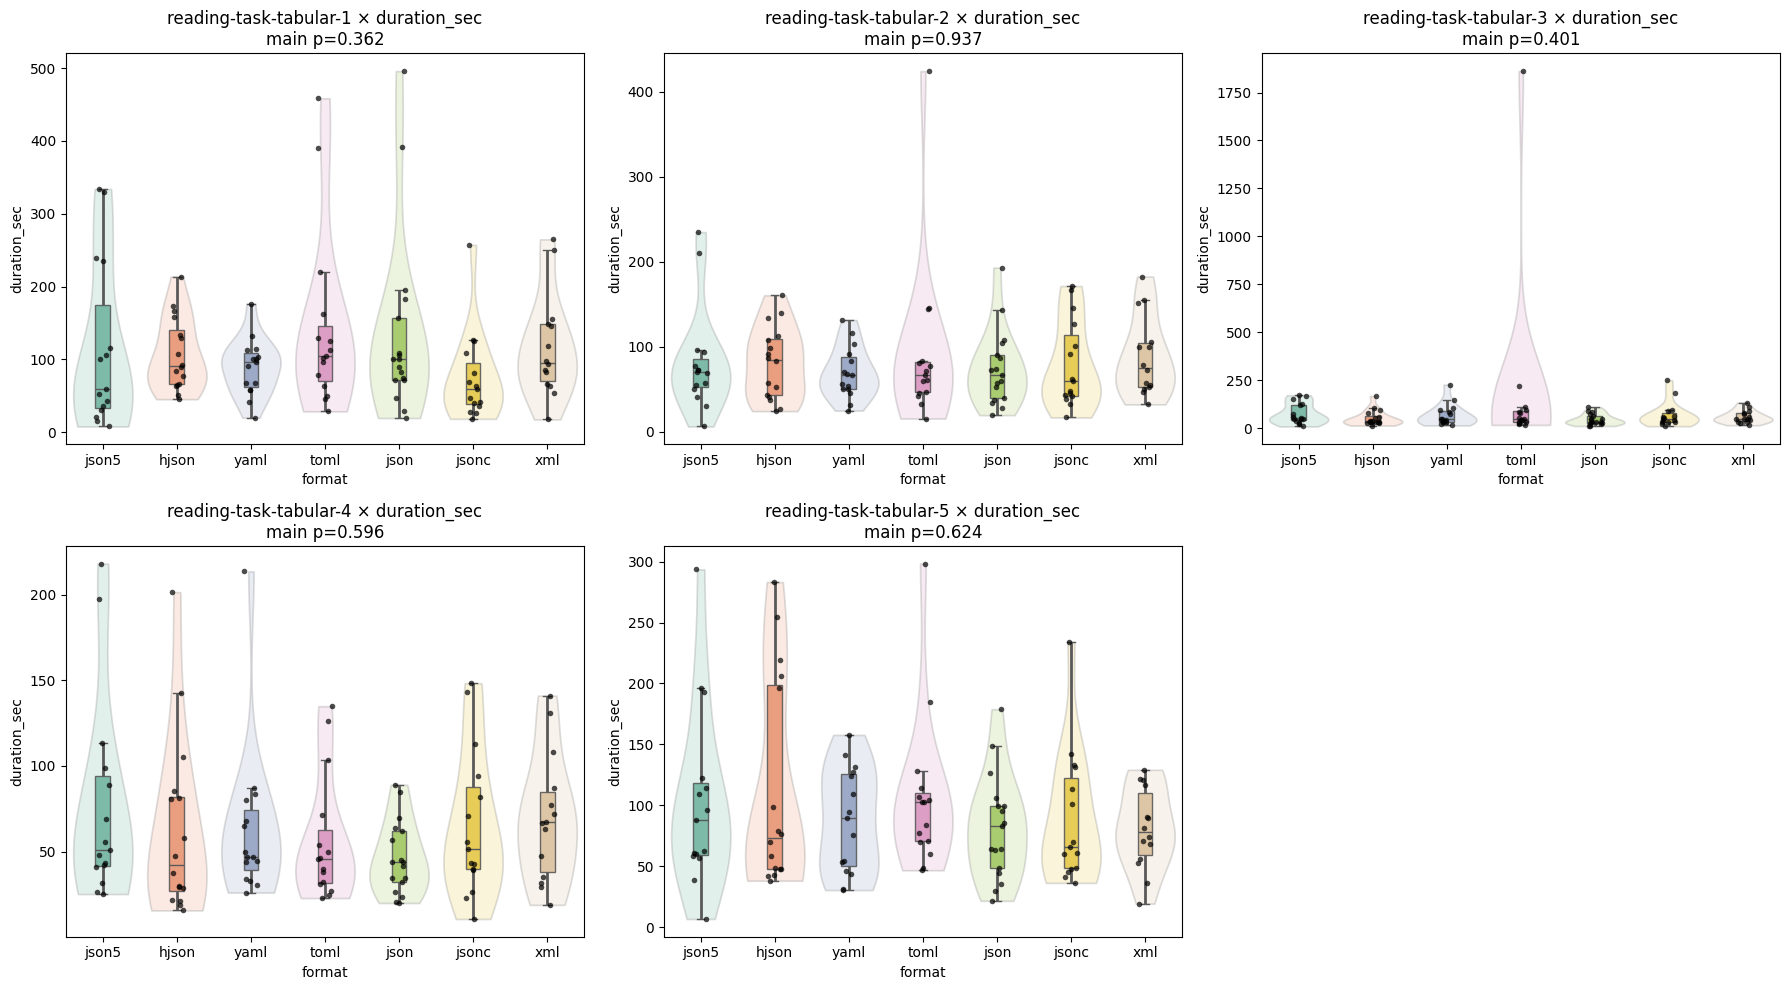

In [3]:
fig, sig_df = compare_tasks_across_formats(
    df=reading_result,
    task_list=["reading-task-tabular-1", "reading-task-tabular-2", "reading-task-tabular-3", "reading-task-tabular-4", "reading-task-tabular-5"],
    compare_values=["duration_sec"],   # or "duration_sec"
    data_type="continuous",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

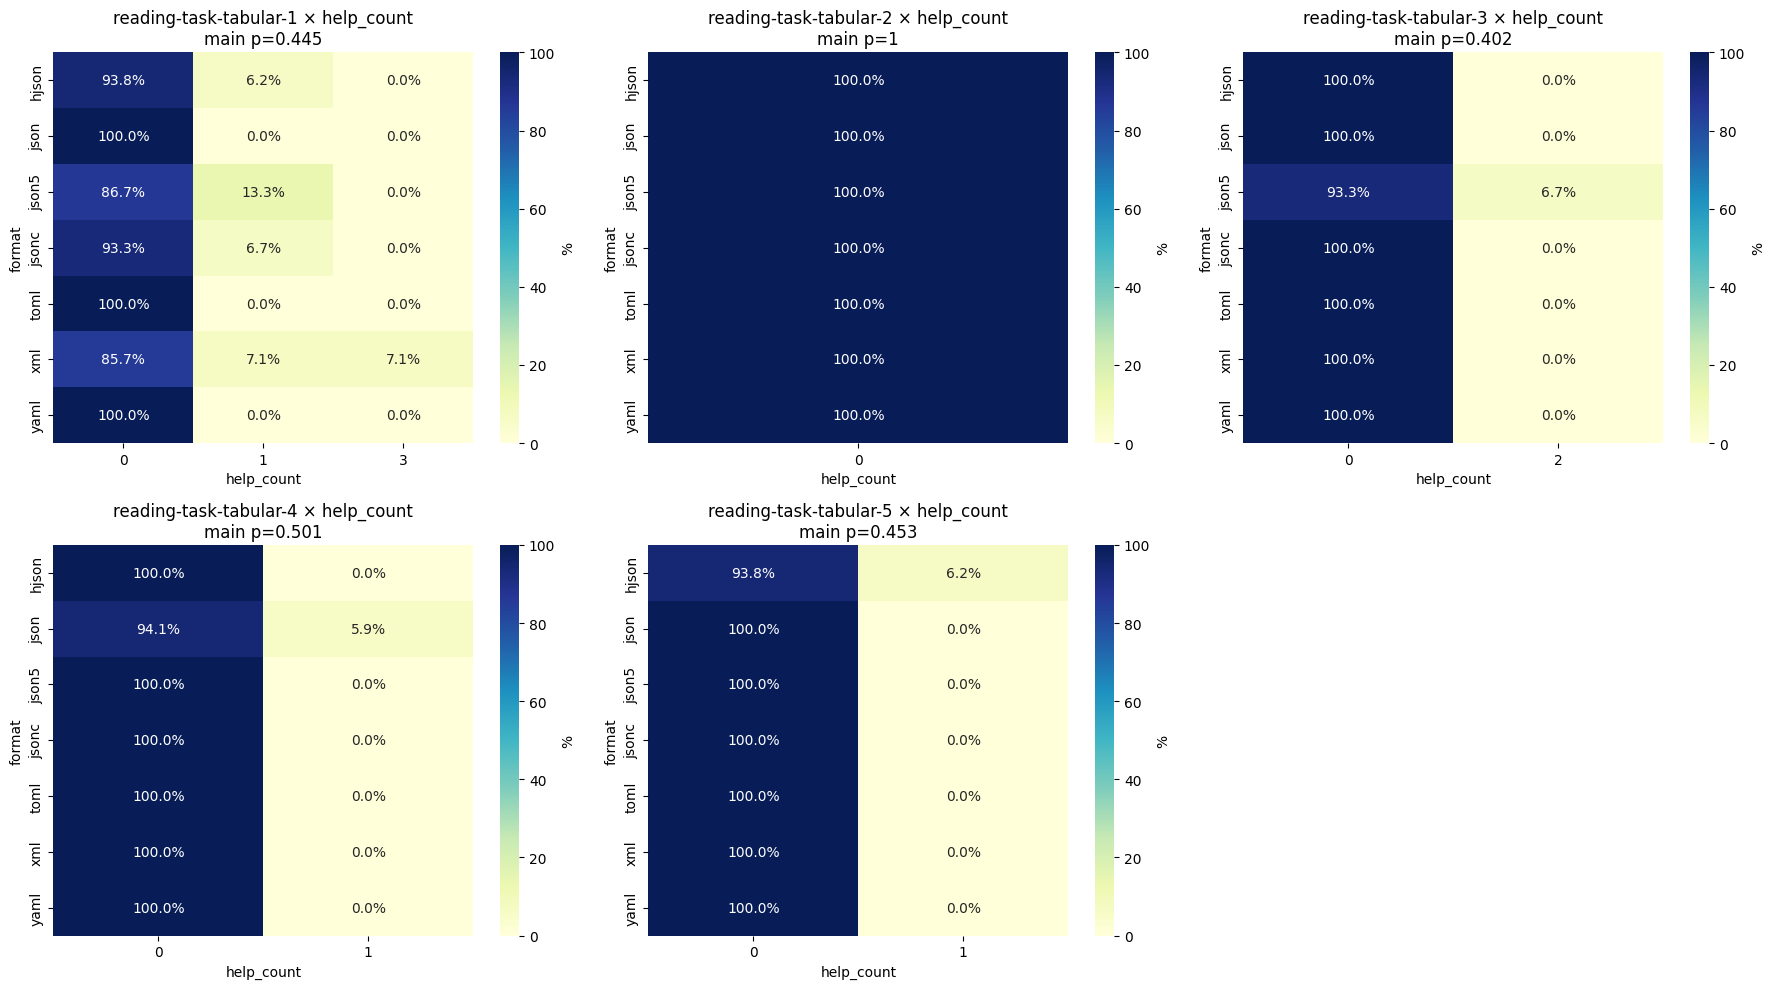

In [4]:
fig, sig_df = compare_tasks_across_formats(
    df=reading_result,
    task_list=["reading-task-tabular-1", "reading-task-tabular-2", "reading-task-tabular-3", "reading-task-tabular-4", "reading-task-tabular-5"],
    compare_values=["help_count"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="categorical",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

In [5]:
fig, sig_df = compare_tasks_across_formats(
    df=reading_result,
    task_list=["reading-task-tabular-1", "reading-task-tabular-2", "reading-task-tabular-3", "reading-task-tabular-4", "reading-task-tabular-5"],
    compare_values=["search_count"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="categorical",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

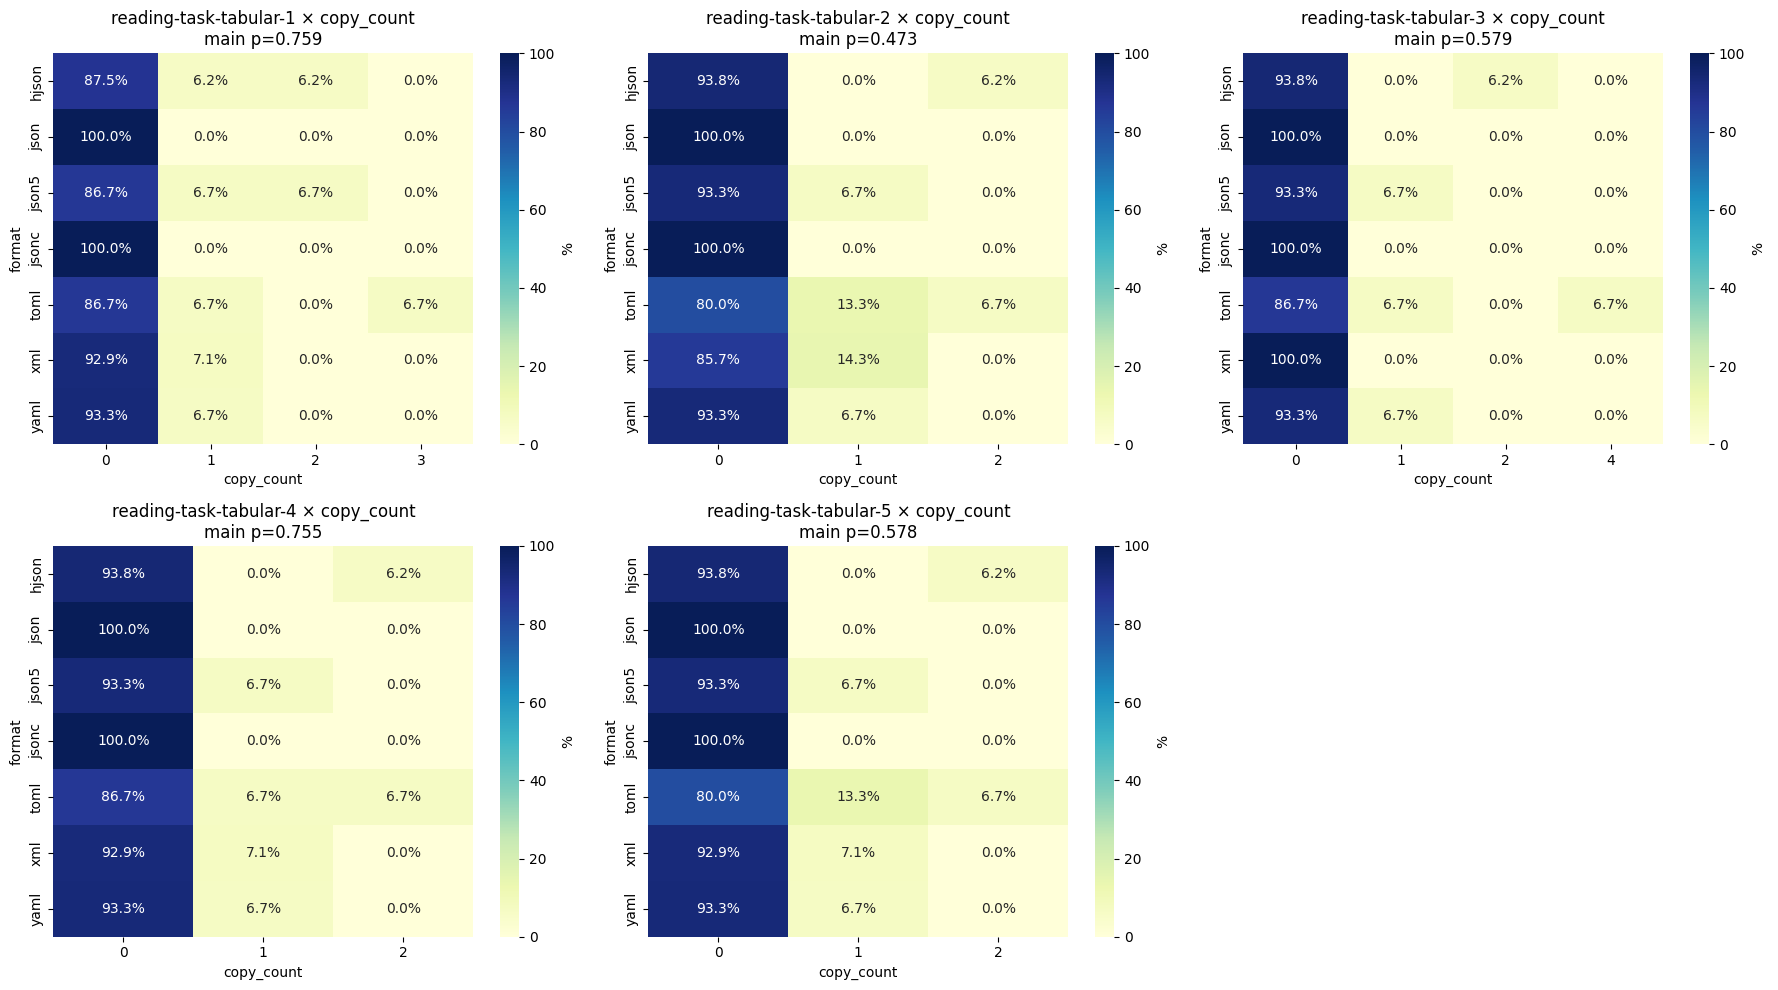

In [6]:
fig, sig_df = compare_tasks_across_formats(
    df=reading_result,
    task_list=["reading-task-tabular-1", "reading-task-tabular-2", "reading-task-tabular-3", "reading-task-tabular-4", "reading-task-tabular-5"],
    compare_values=["copy_count"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="categorical",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

In [7]:
fig, sig_df = compare_tasks_across_formats(
    df=reading_result,
    task_list=["reading-task-tabular-1", "reading-task-tabular-2", "reading-task-tabular-3", "reading-task-tabular-4", "reading-task-tabular-5"],
    compare_values=["paste_count"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="categorical",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

In [8]:
wide_reading_scores = pivot_scores(reading_result)
wide_reading_scores

participantId format  reading-task-tabular-1-correct  \
0    56cb8858edf8da000b6df354  hjson                               1   
1    57c357770e6a1f00015f6038   json                               1   
2    5b68c9eb87af310001584803  json5                               1   
3    5c6414540821d30001046198  hjson                               1   
4    5d30dfa68b1523000134878f   json                               1   
..                        ...    ...                             ...   
102  67f1a4f8dd44e7cd5adffa29  json5                               1   
103  67f1c7bd6f1c4a3d8deae02f   toml                               1   
104  67f3619e16d4ca195fbd1bd0   yaml                               1   
105  67f5bb69760b211cdfe8021c  jsonc                               1   
106  67f913a9b5c79e960807c7e3   yaml                               1   

     reading-task-tabular-2-correct  reading-task-tabular-3-correct  \
0                                 1                               1   
1                                 1                               1   
2                                 1                               1   
3                                 1                               1   
4                                 1                               1   
..                              ...                             ...   
102                               1                               1   
103                               1                               1   
104                               1                               0   
105                               1                               1   
106                               1                               0   

     reading-task-tabular-4-correct  reading-task-tabular-5-correct  
0                                 1                               1  
1                                 1                               1  
2                                 1                               0  
3                                 1                               1  
4                                 1                               1  
..                              ...                             ...  
102                               1                               0  
103                               1                               1  
104                               1                               1  
105                               1                               1  
106                               1                               1  

[107 rows x 7 columns]

### writing-seperate

In [9]:
from scipy.stats import pearsonr, spearmanr

r, p = pearsonr(writing_result['duration_sec'].dropna(), writing_result['normalized_time'].dropna())
print(f"Pearson r = {r:.3f}, p-value = {p:.3f}")

Pearson r = 0.719, p-value = 0.000


In [10]:
r, p = pearsonr(writing_result['tree_similarity'].dropna(), writing_result['f1'].dropna())
print(f"Pearson r = {r:.3f}, p-value = {p:.3f}")

Pearson r = 0.822, p-value = 0.000


In [11]:
writing_result['help_count'].value_counts()

help_count
0     43
2     10
1      9
6      7
3      6
4      5
5      5
10     3
11     3
9      3
18     3
15     1
8      1
7      1
19     1
13     1
45     1
29     1
12     1
35     1
32     1
Name: count, dtype: int64

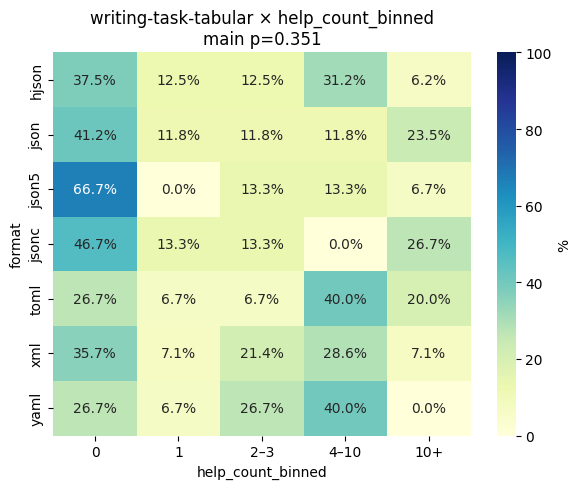

In [13]:
bins = [-1, 0, 1, 3, 10, float("inf")]
labels = ["0", "1", "2–3", "4–10", "10+"]

writing_result["help_count_binned"] = pd.cut(writing_result["help_count"], bins=bins, labels=labels)

fig, sig_df = compare_tasks_across_formats(
    df=writing_result,
    task_list=["writing-task-tabular"],
    compare_values=["help_count_binned"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="categorical",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

In [14]:
fig, sig_df = compare_tasks_across_formats(
    df=writing_result,
    task_list=["writing-task-tabular"],
    compare_values=["search_count"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="categorical",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

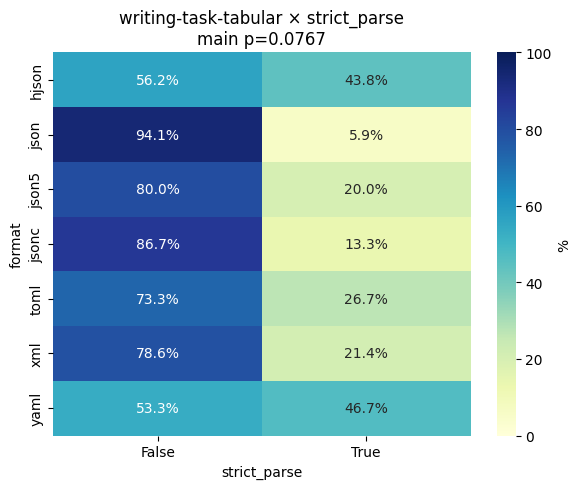

In [15]:
fig, sig_df = compare_tasks_across_formats(
    df=writing_result,
    task_list=["writing-task-tabular"],
    compare_values=["strict_parse"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="categorical",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

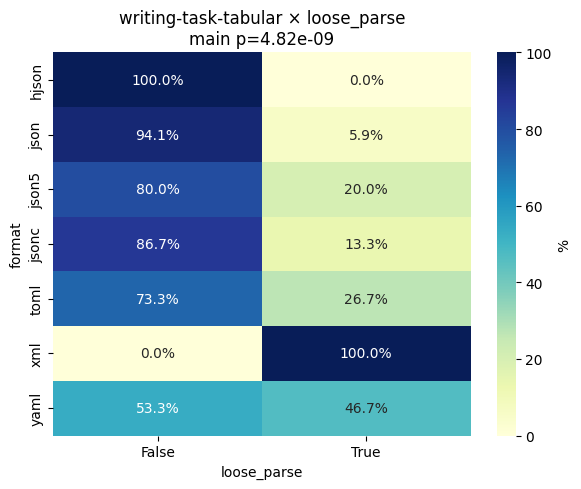

In [16]:
fig, sig_df = compare_tasks_across_formats(
    df=writing_result,
    task_list=["writing-task-tabular"],
    compare_values=["loose_parse"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="categorical",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

In [17]:
fig, sig_df = compare_tasks_across_formats(
    df=writing_result,
    task_list=["writing-task-tabular"],
    compare_values=["tree_similarity"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="continuous",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

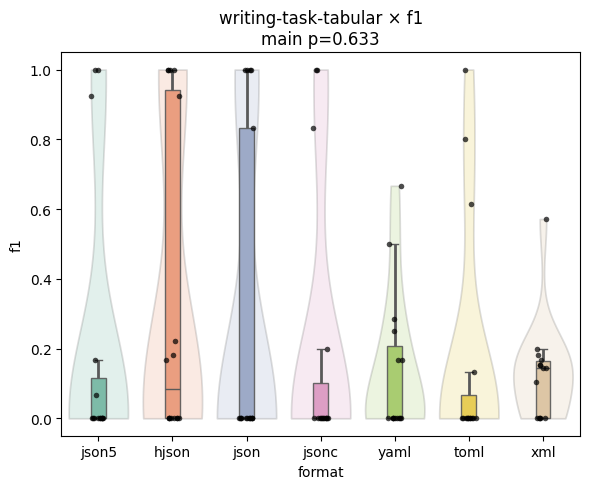

In [18]:
fig, sig_df = compare_tasks_across_formats(
    df=writing_result,
    task_list=["writing-task-tabular"],
    compare_values=["f1"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="continuous",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

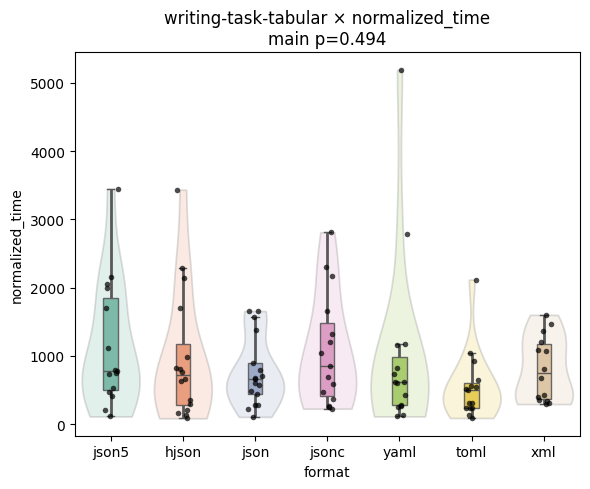

In [19]:
fig, sig_df = compare_tasks_across_formats(
    df=writing_result,
    task_list=["writing-task-tabular"],
    compare_values=["normalized_time"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="continuous",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

In [20]:
writing_score_ts= add_parse_score(writing_result, metric="tree_similarity")
writing_score_f1= add_parse_score(writing_result, metric="f1")
wide_writing_score_ts = pivot_scores(writing_score_ts,participant_col='participantId',format_col='format',task_col='task',value_col='score')
wide_writing_score_f1 = pivot_scores(writing_score_f1,participant_col='participantId',format_col='format',task_col='task',value_col='score')

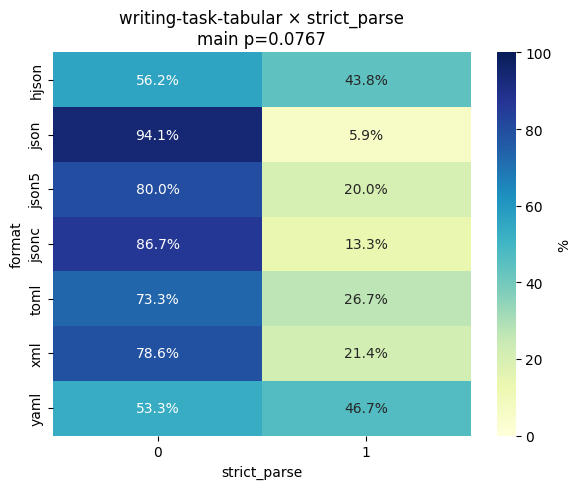

In [99]:
fig, sig_df = compare_tasks_across_formats(
    df=writing_score_ts,
    task_list=["writing-task-tabular"],
    compare_values=["strict_parse"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="categorical",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

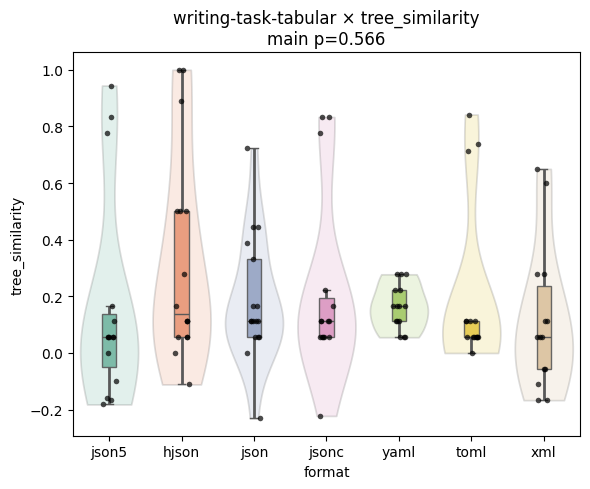

In [100]:
fig, sig_df = compare_tasks_across_formats(
    df=writing_score_ts,
    task_list=["writing-task-tabular"],
    compare_values=["tree_similarity"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="continuous",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

In [97]:
fig, sig_df = compare_tasks_across_formats(
    df=writing_score_ts,
    task_list=["writing-task-tabular"],
    compare_values=["score"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="continuous",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

### modifying-seperate

In [21]:
modifying_result

Unnamed: 0             participantId format  precision  recall        f1  \
0             0  64457bc906c125cebd4bf66b  json5   1.000000    0.75  0.857143   
1             1  6697c8b6d9d7baa7edd8c4d3  hjson   1.000000    1.00  1.000000   
2             2  66475d6f7b27e4443ef0d031   json   0.000000    0.00  0.000000   
3             3  67f5bb69760b211cdfe8021c  jsonc   1.000000    1.00  1.000000   
4             4  67e571bef6af7ecd9c29ad72   json   0.666667    0.50  0.571429   
..          ...                       ...    ...        ...     ...       ...   
423         423  6787d648d7b1963c661f9443  json5   0.000000    0.00  0.000000   
424         424  6787d648d7b1963c661f9443  json5   0.000000    0.00  0.000000   
425         425  66a662a0a709312db9de01f2  jsonc   0.000000    0.00  0.000000   
426         426  66a662a0a709312db9de01f2  jsonc   0.000000    0.00  0.000000   
427         427  67ab650c320eccf6141d4010  jsonc   0.000000    0.00  0.000000   

                         task  tree_similarity  strict_parse  loose_parse  \
0    modifying-task-tabular-1         0.994792          True         True   
1    modifying-task-tabular-1         1.000000          True        False   
2    modifying-task-tabular-1         0.979167          True         True   
3    modifying-task-tabular-1         1.000000          True         True   
4    modifying-task-tabular-1         0.979167          True         True   
..                        ...              ...           ...          ...   
423  modifying-task-tabular-2         0.000000         False        False   
424  modifying-task-tabular-4         0.000000         False        False   
425  modifying-task-tabular-1         0.000000         False        False   
426  modifying-task-tabular-2         0.000000         False        False   
427  modifying-task-tabular-3         0.000000         False        False   

     duration_sec  help_count  search_count  copy_count  paste_count  \
0         156.905           1             0           0            0   
1         311.642           0             0           0            0   
2          85.266           0             0           0            0   
3         182.869           0             0           0            0   
4         283.731           0             0           0            0   
..            ...         ...           ...         ...          ...   
423         6.643           0             0           0            0   
424        18.339           0             0           0            0   
425        84.704           0             0           0            0   
426        22.852           0             0           0            0   
427        30.111           0             0           0            0   

     normalized_time  
0            156.905  
1            311.642  
2             85.266  
3            182.869  
4            283.731  
..               ...  
423            6.643  
424           18.339  
425           84.704  
426           22.852  
427           30.111  

[428 rows x 16 columns]

In [22]:
from scipy.stats import pearsonr, spearmanr

r, p = pearsonr(modifying_result['tree_similarity'].dropna(), modifying_result['f1'].dropna())
print(f"Pearson r = {r:.3f}, p-value = {p:.3f}")

Pearson r = 0.357, p-value = 0.000


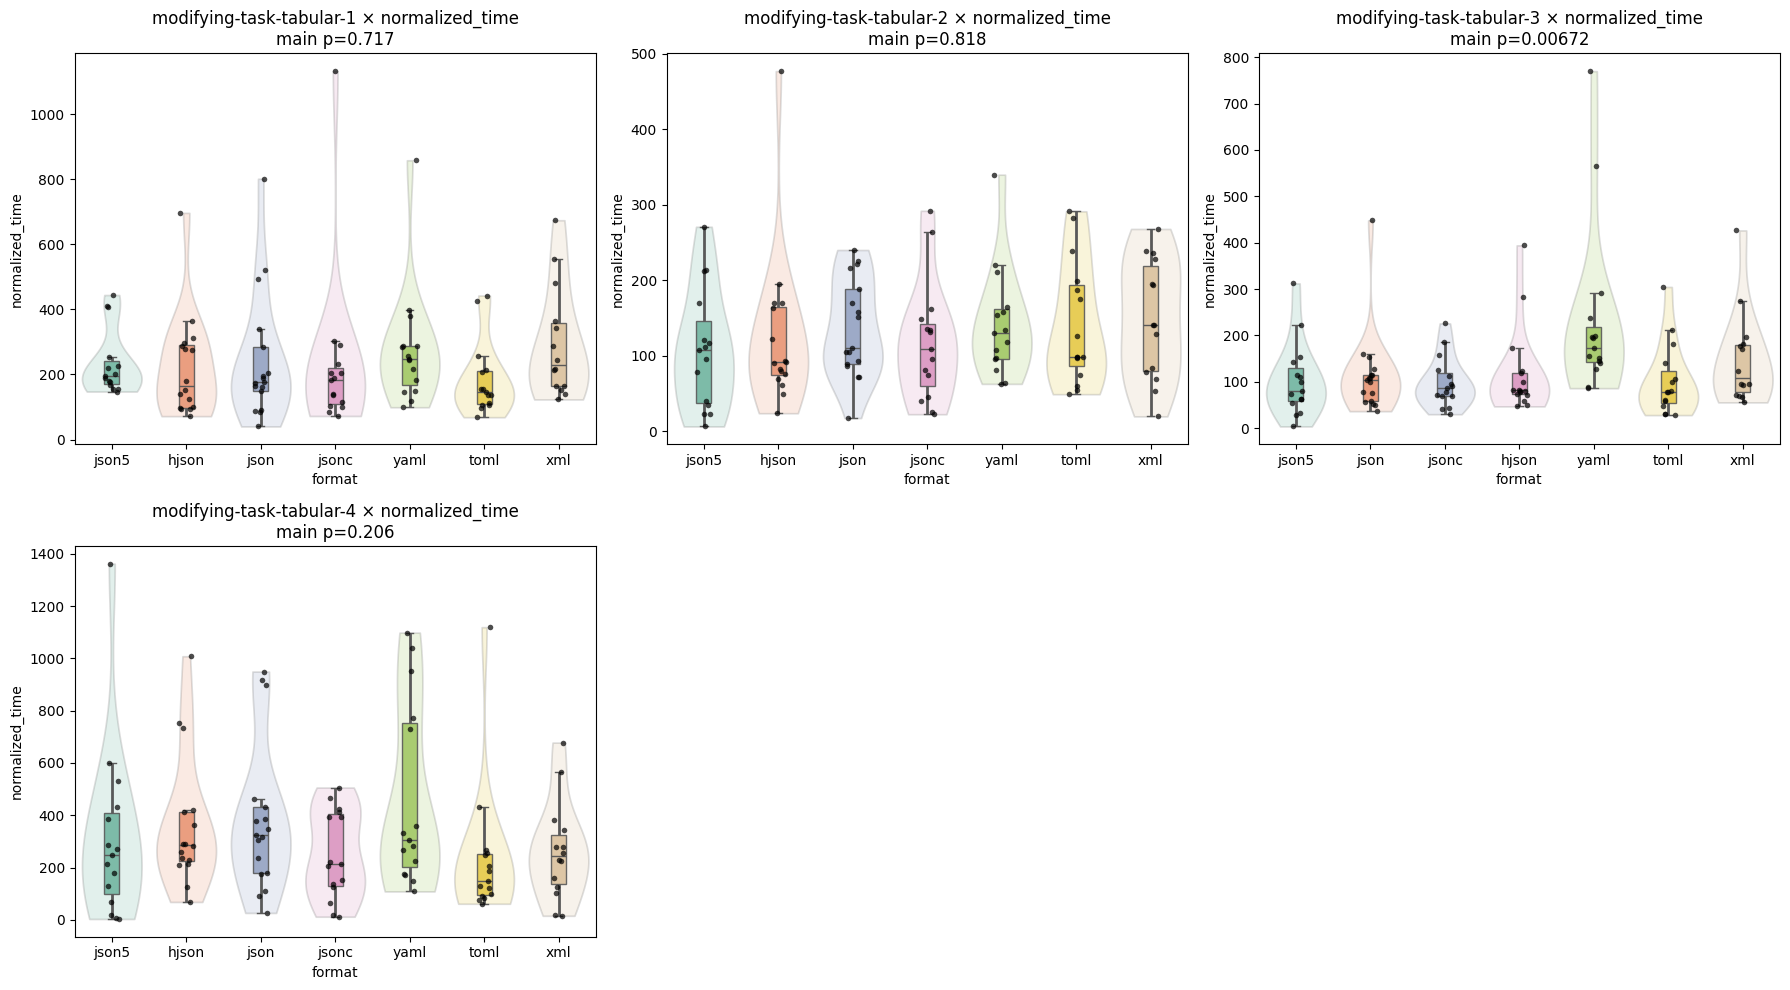

In [25]:
fig, sig_df = compare_tasks_across_formats(
    df=modifying_result,
    task_list=["modifying-task-tabular-1", "modifying-task-tabular-2", "modifying-task-tabular-3", "modifying-task-tabular-4"],
    compare_values=["normalized_time"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="continuous",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

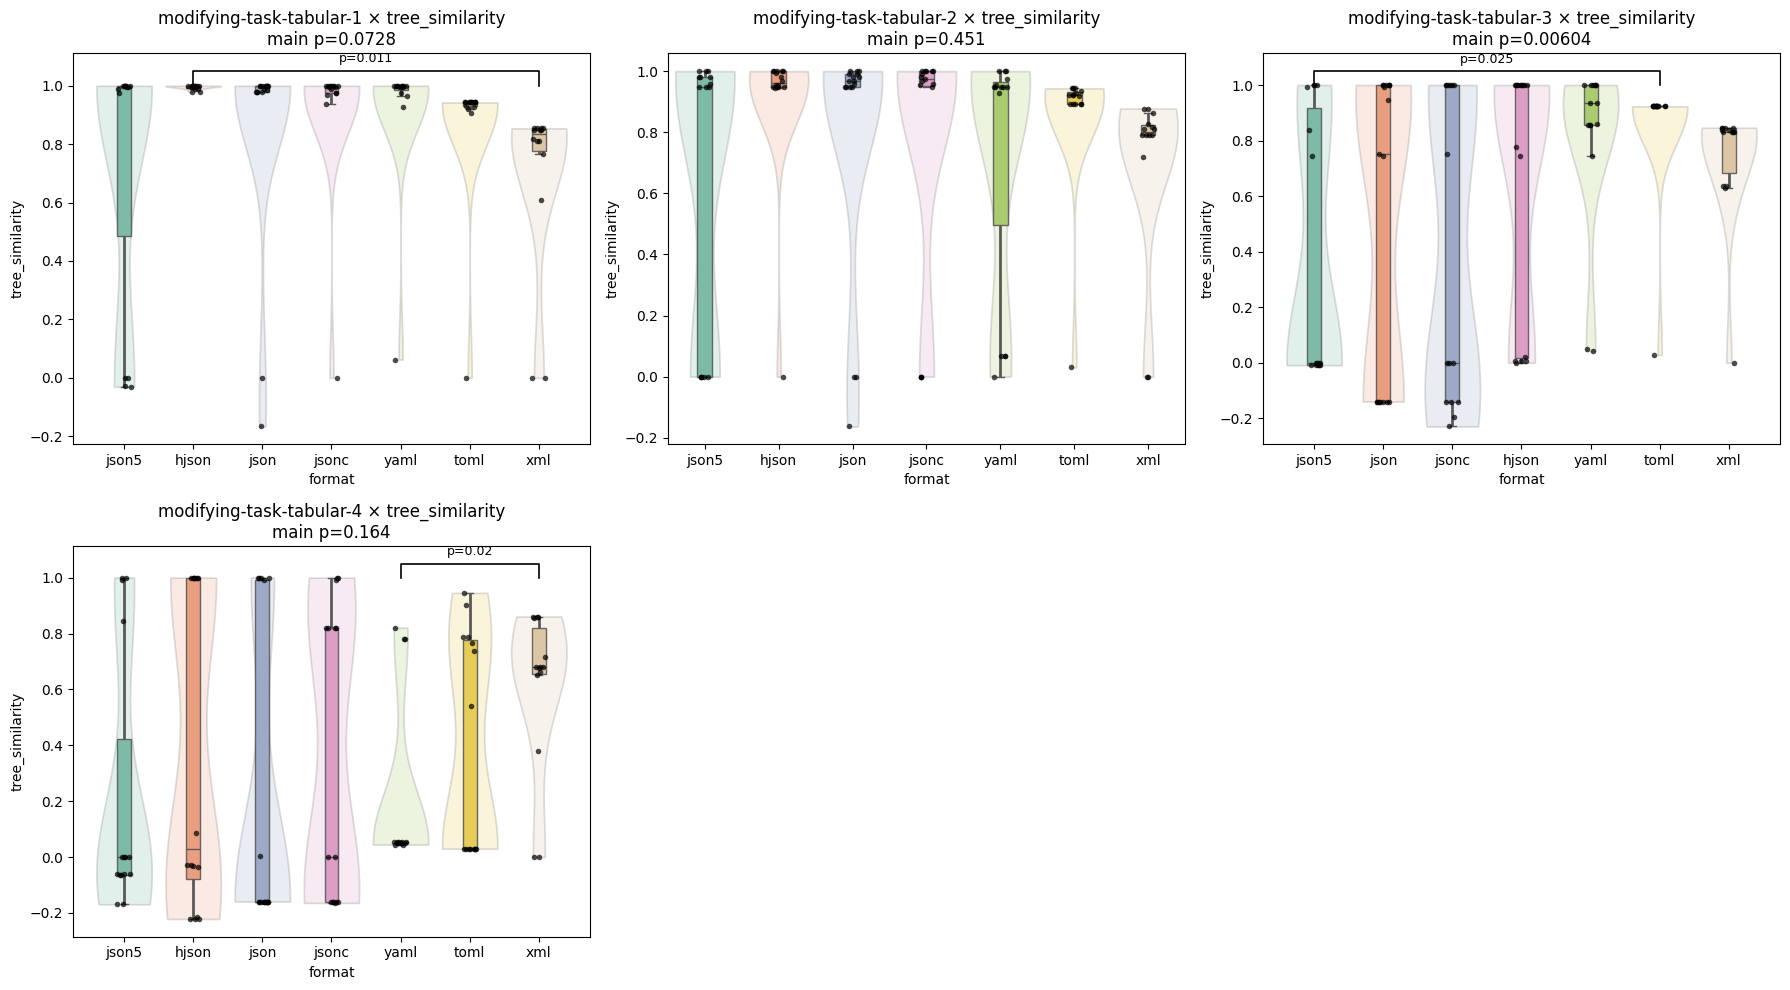

In [27]:
fig, sig_df = compare_tasks_across_formats(
    df=modifying_result,
    task_list=["modifying-task-tabular-1", "modifying-task-tabular-2", "modifying-task-tabular-3", "modifying-task-tabular-4"],
    compare_values=["tree_similarity"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="continuous",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

In [28]:
sig_df[sig_df['p_corr']<0.05]

task           metric format1 format2    p_corr
10  modifying-task-tabular-1  tree_similarity   hjson     xml  0.010852
46  modifying-task-tabular-3  tree_similarity   json5    toml  0.025159
82  modifying-task-tabular-4  tree_similarity    yaml     xml  0.019551

In [29]:
modifying_score_ts= add_parse_score(modifying_result, metric="tree_similarity")
modifying_score_f1= add_parse_score(modifying_result, metric="f1")
wide_modifying_score_ts = pivot_scores(modifying_score_ts,participant_col='participantId',format_col='format',task_col='task',value_col='score')
wide_modifying_score_f1 = pivot_scores(modifying_score_f1,participant_col='participantId',format_col='format',task_col='task',value_col='score')
wide_modifying_score_ts

participantId format  modifying-task-tabular-1-score  \
0    56cb8858edf8da000b6df354  hjson                        1.000000   
1    57c357770e6a1f00015f6038   json                        1.000000   
2    5b68c9eb87af310001584803  json5                        0.994792   
3    5c6414540821d30001046198  hjson                        1.000000   
4    5d30dfa68b1523000134878f   json                        1.000000   
..                        ...    ...                             ...   
102  67f1a4f8dd44e7cd5adffa29  json5                        0.986979   
103  67f1c7bd6f1c4a3d8deae02f   toml                        0.963542   
104  67f3619e16d4ca195fbd1bd0   yaml                        1.000000   
105  67f5bb69760b211cdfe8021c  jsonc                        1.000000   
106  67f913a9b5c79e960807c7e3   yaml                        0.997396   

     modifying-task-tabular-2-score  modifying-task-tabular-3-score  \
0                          1.000000                        1.000000   
1                          0.500000                       -0.069930   
2                          0.474490                       -0.004630   
3                          0.974490                        0.003731   
4                          0.494924                        0.973510   
..                              ...                             ...   
102                        0.000000                        0.000000   
103                        0.964286                        0.961538   
104                        1.000000                        1.000000   
105                        1.000000                        1.000000   
106                        0.974490                        1.000000   

     modifying-task-tabular-4-score  
0                          1.000000  
1                         -0.079602  
2                          0.000000  
3                          1.000000  
4                          1.000000  
..                              ...  
102                        0.000000  
103                        0.893035  
104                        0.024876  
105                        0.495025  
106                        0.024876  

[107 rows x 6 columns]

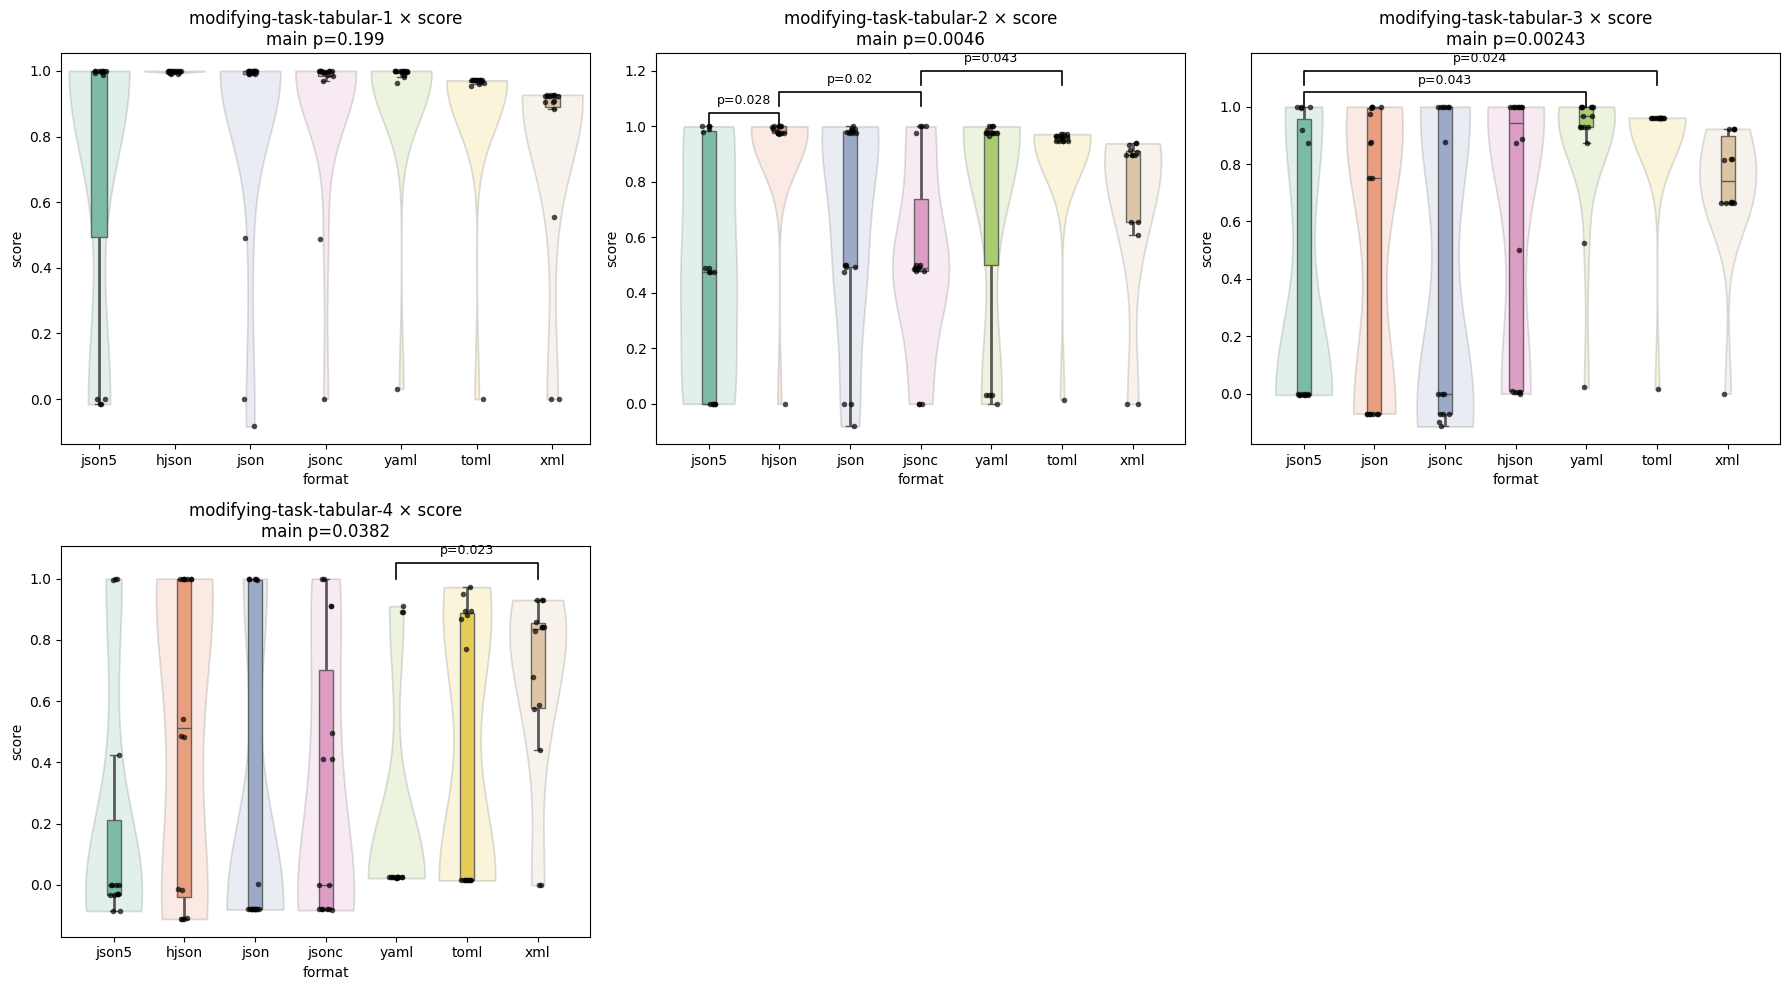

In [96]:
fig, sig_df = compare_tasks_across_formats(
    df=modifying_score_ts,
    task_list=["modifying-task-tabular-1", "modifying-task-tabular-2", "modifying-task-tabular-3", "modifying-task-tabular-4"],
    compare_values=["score"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="continuous",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

### total score

In [30]:
import pandas as pd
from functools import reduce

def merge_all_scores(
    dfs: list[pd.DataFrame],
    on: list[str] = ['participantId', 'format'],
    how: str = 'outer'
) -> pd.DataFrame:

    return reduce(
        lambda left, right: pd.merge(left, right, on=on, how=how),
        dfs
    )


wide_f1 = merge_all_scores([
    wide_reading_scores,
    wide_modifying_score_f1,
    wide_writing_score_f1
])

wide_ts = merge_all_scores([
    wide_reading_scores,
    wide_modifying_score_ts,
    wide_writing_score_ts
])
wide_f1

participantId format  reading-task-tabular-1-correct  \
0    56cb8858edf8da000b6df354  hjson                               1   
1    57c357770e6a1f00015f6038   json                               1   
2    5b68c9eb87af310001584803  json5                               1   
3    5c6414540821d30001046198  hjson                               1   
4    5d30dfa68b1523000134878f   json                               1   
..                        ...    ...                             ...   
102  67f1a4f8dd44e7cd5adffa29  json5                               1   
103  67f1c7bd6f1c4a3d8deae02f   toml                               1   
104  67f3619e16d4ca195fbd1bd0   yaml                               1   
105  67f5bb69760b211cdfe8021c  jsonc                               1   
106  67f913a9b5c79e960807c7e3   yaml                               1   

     reading-task-tabular-2-correct  reading-task-tabular-3-correct  \
0                                 1                               1   
1                                 1                               1   
2                                 1                               1   
3                                 1                               1   
4                                 1                               1   
..                              ...                             ...   
102                               1                               1   
103                               1                               1   
104                               1                               0   
105                               1                               1   
106                               1                               0   

     reading-task-tabular-4-correct  reading-task-tabular-5-correct  \
0                                 1                               1   
1                                 1                               1   
2                                 1                               0   
3                                 1                               1   
4                                 1                               1   
..                              ...                             ...   
102                               1                               0   
103                               1                               1   
104                               1                               1   
105                               1                               1   
106                               1                               1   

     modifying-task-tabular-1-score  modifying-task-tabular-2-score  \
0                          1.000000                             0.5   
1                          1.000000                             0.0   
2                          0.900000                             0.0   
3                          1.000000                             0.5   
4                          1.000000                             0.0   
..                              ...                             ...   
102                        0.500000                             0.0   
103                        0.500000                             0.5   
104                        1.000000                             0.5   
105                        1.000000                             0.5   
106                        0.928571                             0.5   

     modifying-task-tabular-3-score  modifying-task-tabular-4-score  \
0                               0.5                             1.0   
1                               0.0                             0.0   
2                               0.0                             0.0   
3                               0.0                             1.0   
4                               0.5                             1.0   
..                              ...                             ...   
102                             0.0                             0.0   
103                     

#### f1

In [26]:
wide_f1_group=total_score_group_norm(wide_f1)
wide_f1_global=total_score_global_then_group(wide_f1)
wide_f1_group_result=wide_f1_group[['participantId','format','total_score']]
wide_f1_group_result['task']='total'
wide_f1_global_result=wide_f1_global[['participantId','format','total_score']]
wide_f1_global_result['task']='total'

/var/folders/z4/3vn4jgtj71n_hdpgm6b1r_ww0000gp/T/ipykernel_91374/1371278814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wide_f1_group_result['task']='total'
/var/folders/z4/3vn4jgtj71n_hdpgm6b1r_ww0000gp/T/ipykernel_91374/1371278814.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wide_f1_global_result['task']='total'


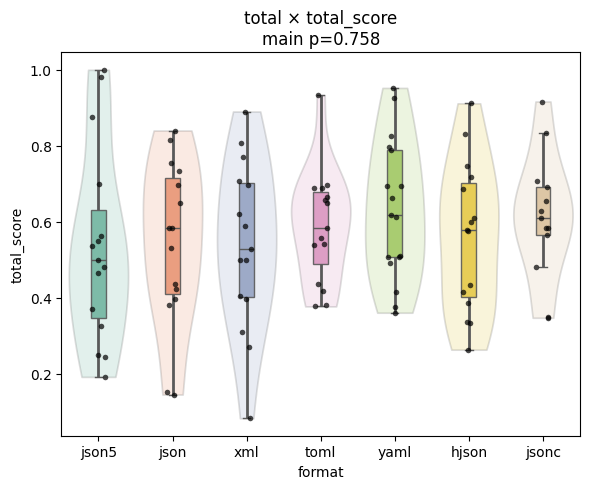

In [28]:
fig, sig_df = compare_tasks_across_formats(
    df=wide_f1_global_result,
    task_list=["total"],
    compare_values=["total_score"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="continuous",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

#### ts

In [32]:
wide_ts_group=total_score_group_norm(wide_ts)
wide_ts_global=total_score_global_then_group(wide_ts)
wide_ts_group_result=wide_ts_group[['participantId','format','total_score']]
wide_ts_group_result['task']='total'
wide_ts_global_result=wide_ts_global[['participantId','format','total_score']]
wide_ts_global_result['task']='total'

/var/folders/z4/3vn4jgtj71n_hdpgm6b1r_ww0000gp/T/ipykernel_26541/1740887195.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wide_ts_group_result['task']='total'
/var/folders/z4/3vn4jgtj71n_hdpgm6b1r_ww0000gp/T/ipykernel_26541/1740887195.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wide_ts_global_result['task']='total'


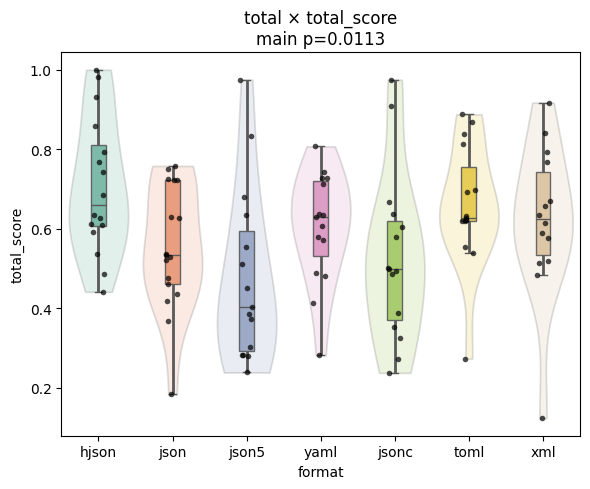

In [33]:
fig, sig_df = compare_tasks_across_formats(
    df=wide_ts_global_result,
    task_list=["total"],
    compare_values=["total_score"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="continuous",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

In [109]:
wide_ts_global_result

participantId format  total_score   task
0    56cb8858edf8da000b6df354  hjson     0.742656  total
1    57c357770e6a1f00015f6038   json     0.535604  total
2    5b68c9eb87af310001584803  json5     0.403386  total
3    5c6414540821d30001046198  hjson     0.626937  total
4    5d30dfa68b1523000134878f   json     0.723415  total
..                        ...    ...          ...    ...
102  67f1a4f8dd44e7cd5adffa29  json5     0.373609  total
103  67f1c7bd6f1c4a3d8deae02f   toml     0.691687  total
104  67f3619e16d4ca195fbd1bd0   yaml     0.572115  total
105  67f5bb69760b211cdfe8021c  jsonc     0.668555  total
106  67f913a9b5c79e960807c7e3   yaml     0.578078  total

[107 rows x 4 columns]

In [110]:
wide_ts_global_result['task']='tabular'
wide_ts_global_result.to_csv('/Users/shiyi.he/Desktop/DSF_Analysis/score_tabular.csv',index=False)

/var/folders/z4/3vn4jgtj71n_hdpgm6b1r_ww0000gp/T/ipykernel_26541/1883969294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wide_ts_global_result['task']='tabular'


### total time

In [112]:
writing_parse=writing_result[['participantId','format','task','strict_parse','loose_parse']]
writing_parse.to_csv('/Users/shiyi.he/Desktop/DSF_Analysis/writing_parse_tabular.csv',index=False)
modifying_parse=modifying_result[['participantId','format','task','strict_parse','loose_parse']]
modifying_parse.to_csv('/Users/shiyi.he/Desktop/DSF_Analysis/modifying_parse_tabular.csv',index=False)

In [34]:
reading_result['normalized_time']=reading_result['duration_sec']
writing_result_time=writing_result[['participantId','format','task','duration_sec','normalized_time']]
reading_result_time=reading_result[['participantId','format','task','duration_sec','normalized_time']]
modifying_result_time=modifying_result[['participantId','format','task','duration_sec','normalized_time']]
result_time = pd.concat([writing_result_time,reading_result_time,modifying_result_time])
total_time = sum_time_per_participant(result_time)

In [35]:
from scipy.stats import pearsonr, spearmanr

r, p = pearsonr(total_time['duration_sec_total'].dropna(), total_time['normalized_time_total'].dropna())
print(f"Pearson r = {r:.3f}, p-value = {p:.3f}")

Pearson r = 0.884, p-value = 0.000


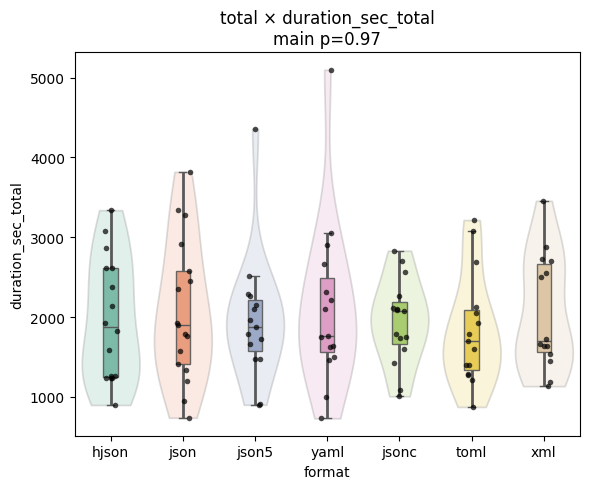

In [36]:
fig, sig_df = compare_tasks_across_formats(
    df=total_time,
    task_list=["total"],
    compare_values=["duration_sec_total"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="continuous",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

In [111]:
total_time['task']='tabular'
total_time.to_csv('/Users/shiyi.he/Desktop/DSF_Analysis/total_time_tabular.csv',index=False)

### participants background

#### quiz

In [37]:
def aggregate_tutorial(df: pd.DataFrame) -> pd.DataFrame:

    # 1) 先过滤出 tutorial-part1 和 tutorial-part2
    df_sub = df[df['task'].str.startswith('tutorial-')].copy()

    # 2) 分组并求和数值列
    agg = (
        df_sub
        .groupby(['participantId','format'], as_index=False)
        .agg({
            'correct':            'sum',
            'num_wrong_attempts': 'sum',
            'duration_sec':       'sum',
            'wrong_choice_count': 'sum'
        })
    )

    # 3) 增加统一的 task 列
    agg['task'] = 'tutorial'

    # 4) 如果你想把列顺序和原来一致，可以这么排一下：
    cols = ['participantId','format','task',
            'correct','num_wrong_attempts','duration_sec','wrong_choice_count']
    return agg[cols]

# 用法示例
# 假设 quiz_result 就是你那张 210 行的表
tutorial_summary = aggregate_tutorial(quiz_result)
tutorial_summary


participantId format      task  correct  num_wrong_attempts  \
0    56cb8858edf8da000b6df354  hjson  tutorial        2                   0   
1    57c357770e6a1f00015f6038   json  tutorial        2                   1   
2    5b68c9eb87af310001584803  json5  tutorial        2                   3   
3    5c6414540821d30001046198  hjson  tutorial        2                   2   
4    5d30dfa68b1523000134878f   json  tutorial        2                   3   
..                        ...    ...       ...      ...                 ...   
102  67f1a4f8dd44e7cd5adffa29  json5  tutorial        2                   3   
103  67f1c7bd6f1c4a3d8deae02f   toml  tutorial        2                   0   
104  67f3619e16d4ca195fbd1bd0   yaml  tutorial        2                   3   
105  67f5bb69760b211cdfe8021c  jsonc  tutorial        1                   5   
106  67f913a9b5c79e960807c7e3   yaml  tutorial        2                   2   

     duration_sec  wrong_choice_count  
0         312.739                   0  
1         638.375                   1  
2         242.956                   2  
3         898.700                   0  
4         604.996                   6  
..            ...                 ...  
102       706.270                   5  
103       588.912                   0  
104       340.818                   1  
105       277.498                   0  
106       632.020                   2  

[107 rows x 7 columns]

In [38]:
fig, sig_df = compare_tasks_across_formats(
    df=tutorial_summary,
    task_list=["tutorial"],
    compare_values=["duration_sec"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="continuous",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

In [39]:
fig, sig_df = compare_tasks_across_formats(
    df=tutorial_summary,
    task_list=["tutorial"],
    compare_values=["correct"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="categorical",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

In [114]:
tutorial_summary.to_csv('/Users/shiyi.he/Desktop/DSF_Analysis/tutorial_summary_tabular.csv',index=False)

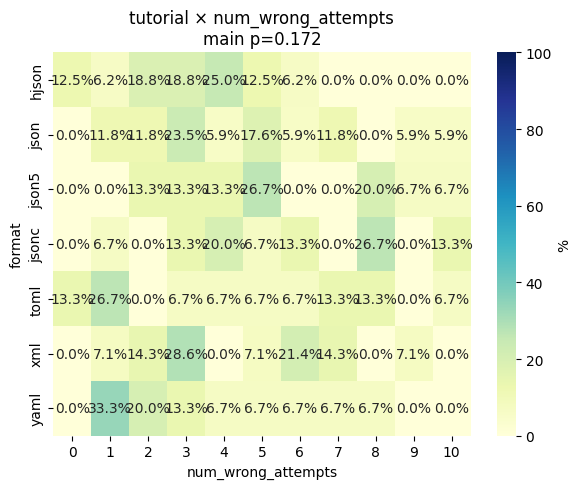

In [40]:
fig, sig_df = compare_tasks_across_formats(
    df=tutorial_summary,
    task_list=["tutorial"],
    compare_values=["num_wrong_attempts"],   # or "duration_sec" help_count search_count copy_count paste_count
    data_type="categorical",   # "continuous" or "categorical"
    test_type="auto",          # 推荐保持 auto
    correction_method="holm"
)

#### nasa

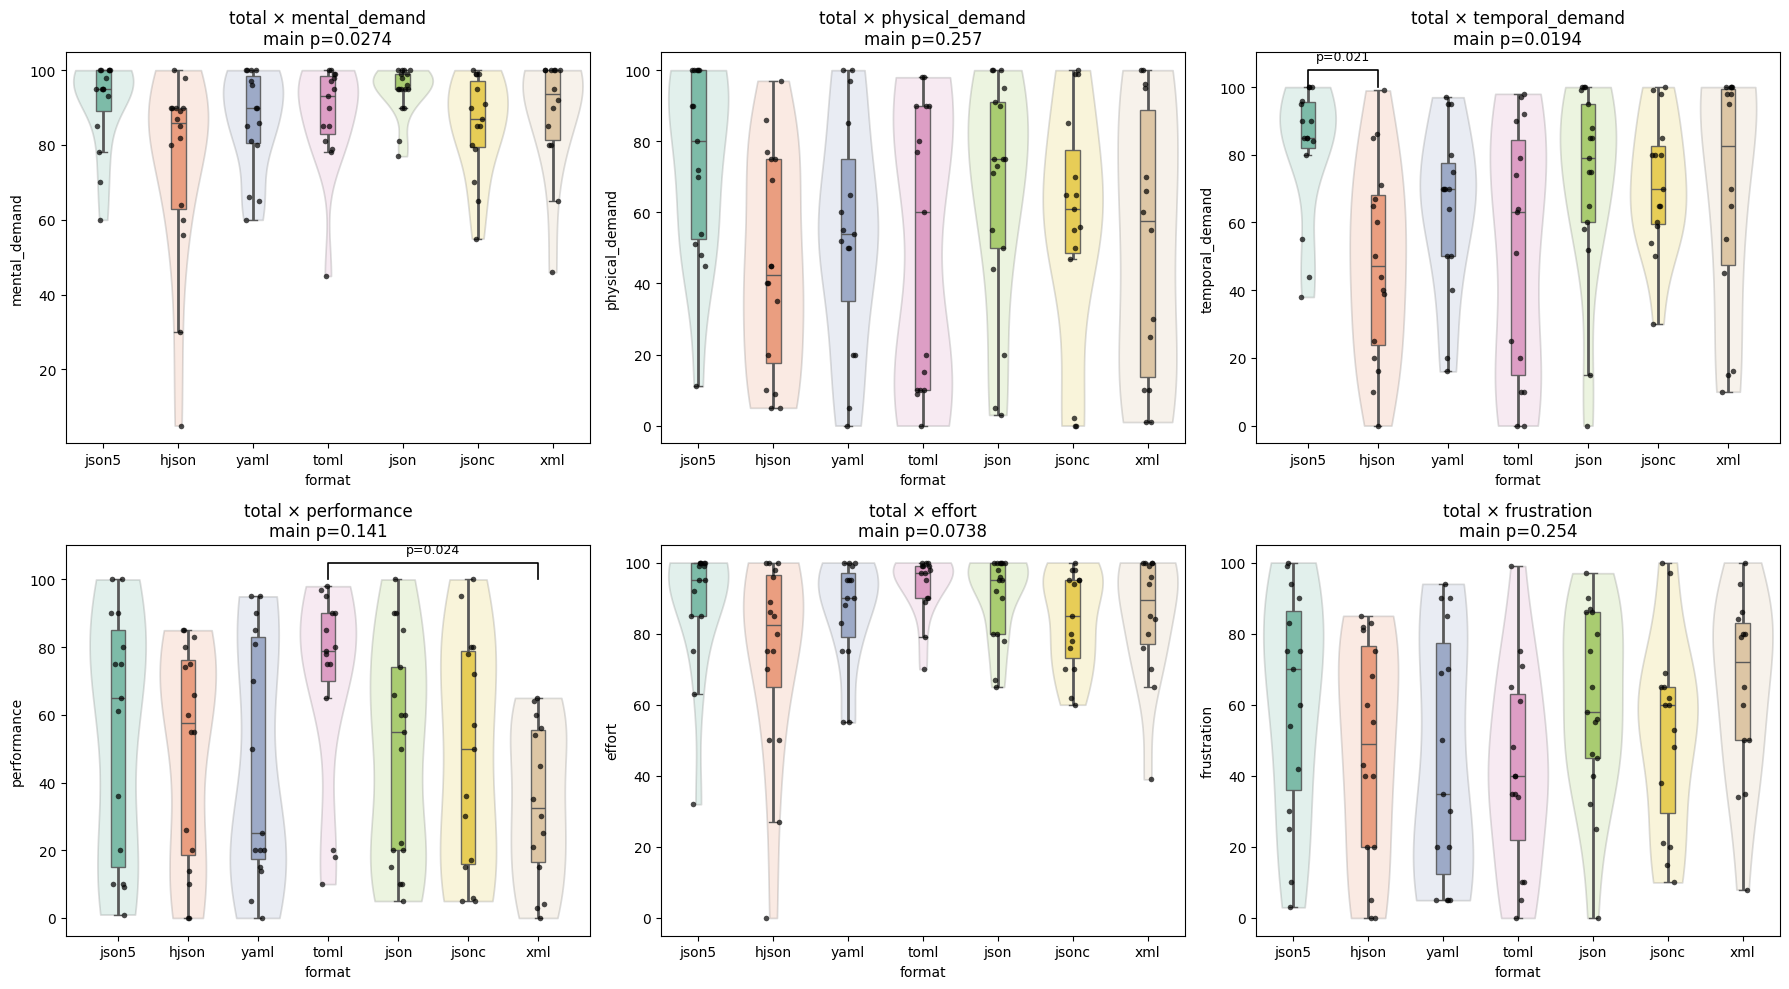

In [41]:
nasa_result.rename(columns={'frustration':'frustration', 'mental-demand':'mental_demand', 'physical-demand':'physical_demand', 'temporal-demand':'temporal_demand', 'performance':'performance', 'effort':'effort'},inplace=True)
nasa_result['task']='total'
fig, posthoc = compare_tasks_across_formats(
    df=nasa_result,
    task_list=['total'],
    compare_values=['mental_demand','physical_demand','temporal_demand','performance','effort','frustration'],  # 传入一个或多个指标
    data_type='continuous',      # continuous 或 'categorical'
    test_type='auto',
    alpha=0.05,
    correction_method='holm'
)

In [117]:
nasa_result.to_csv('/Users/shiyi.he/Desktop/DSF_Analysis/nasa_tabular.csv',index=False)

In [118]:
avg_by_format['task']='tabular'
avg_by_format.to_csv('/Users/shiyi.he/Desktop/DSF_Analysis/lk_tabular.csv',index=False)

#### conf diff

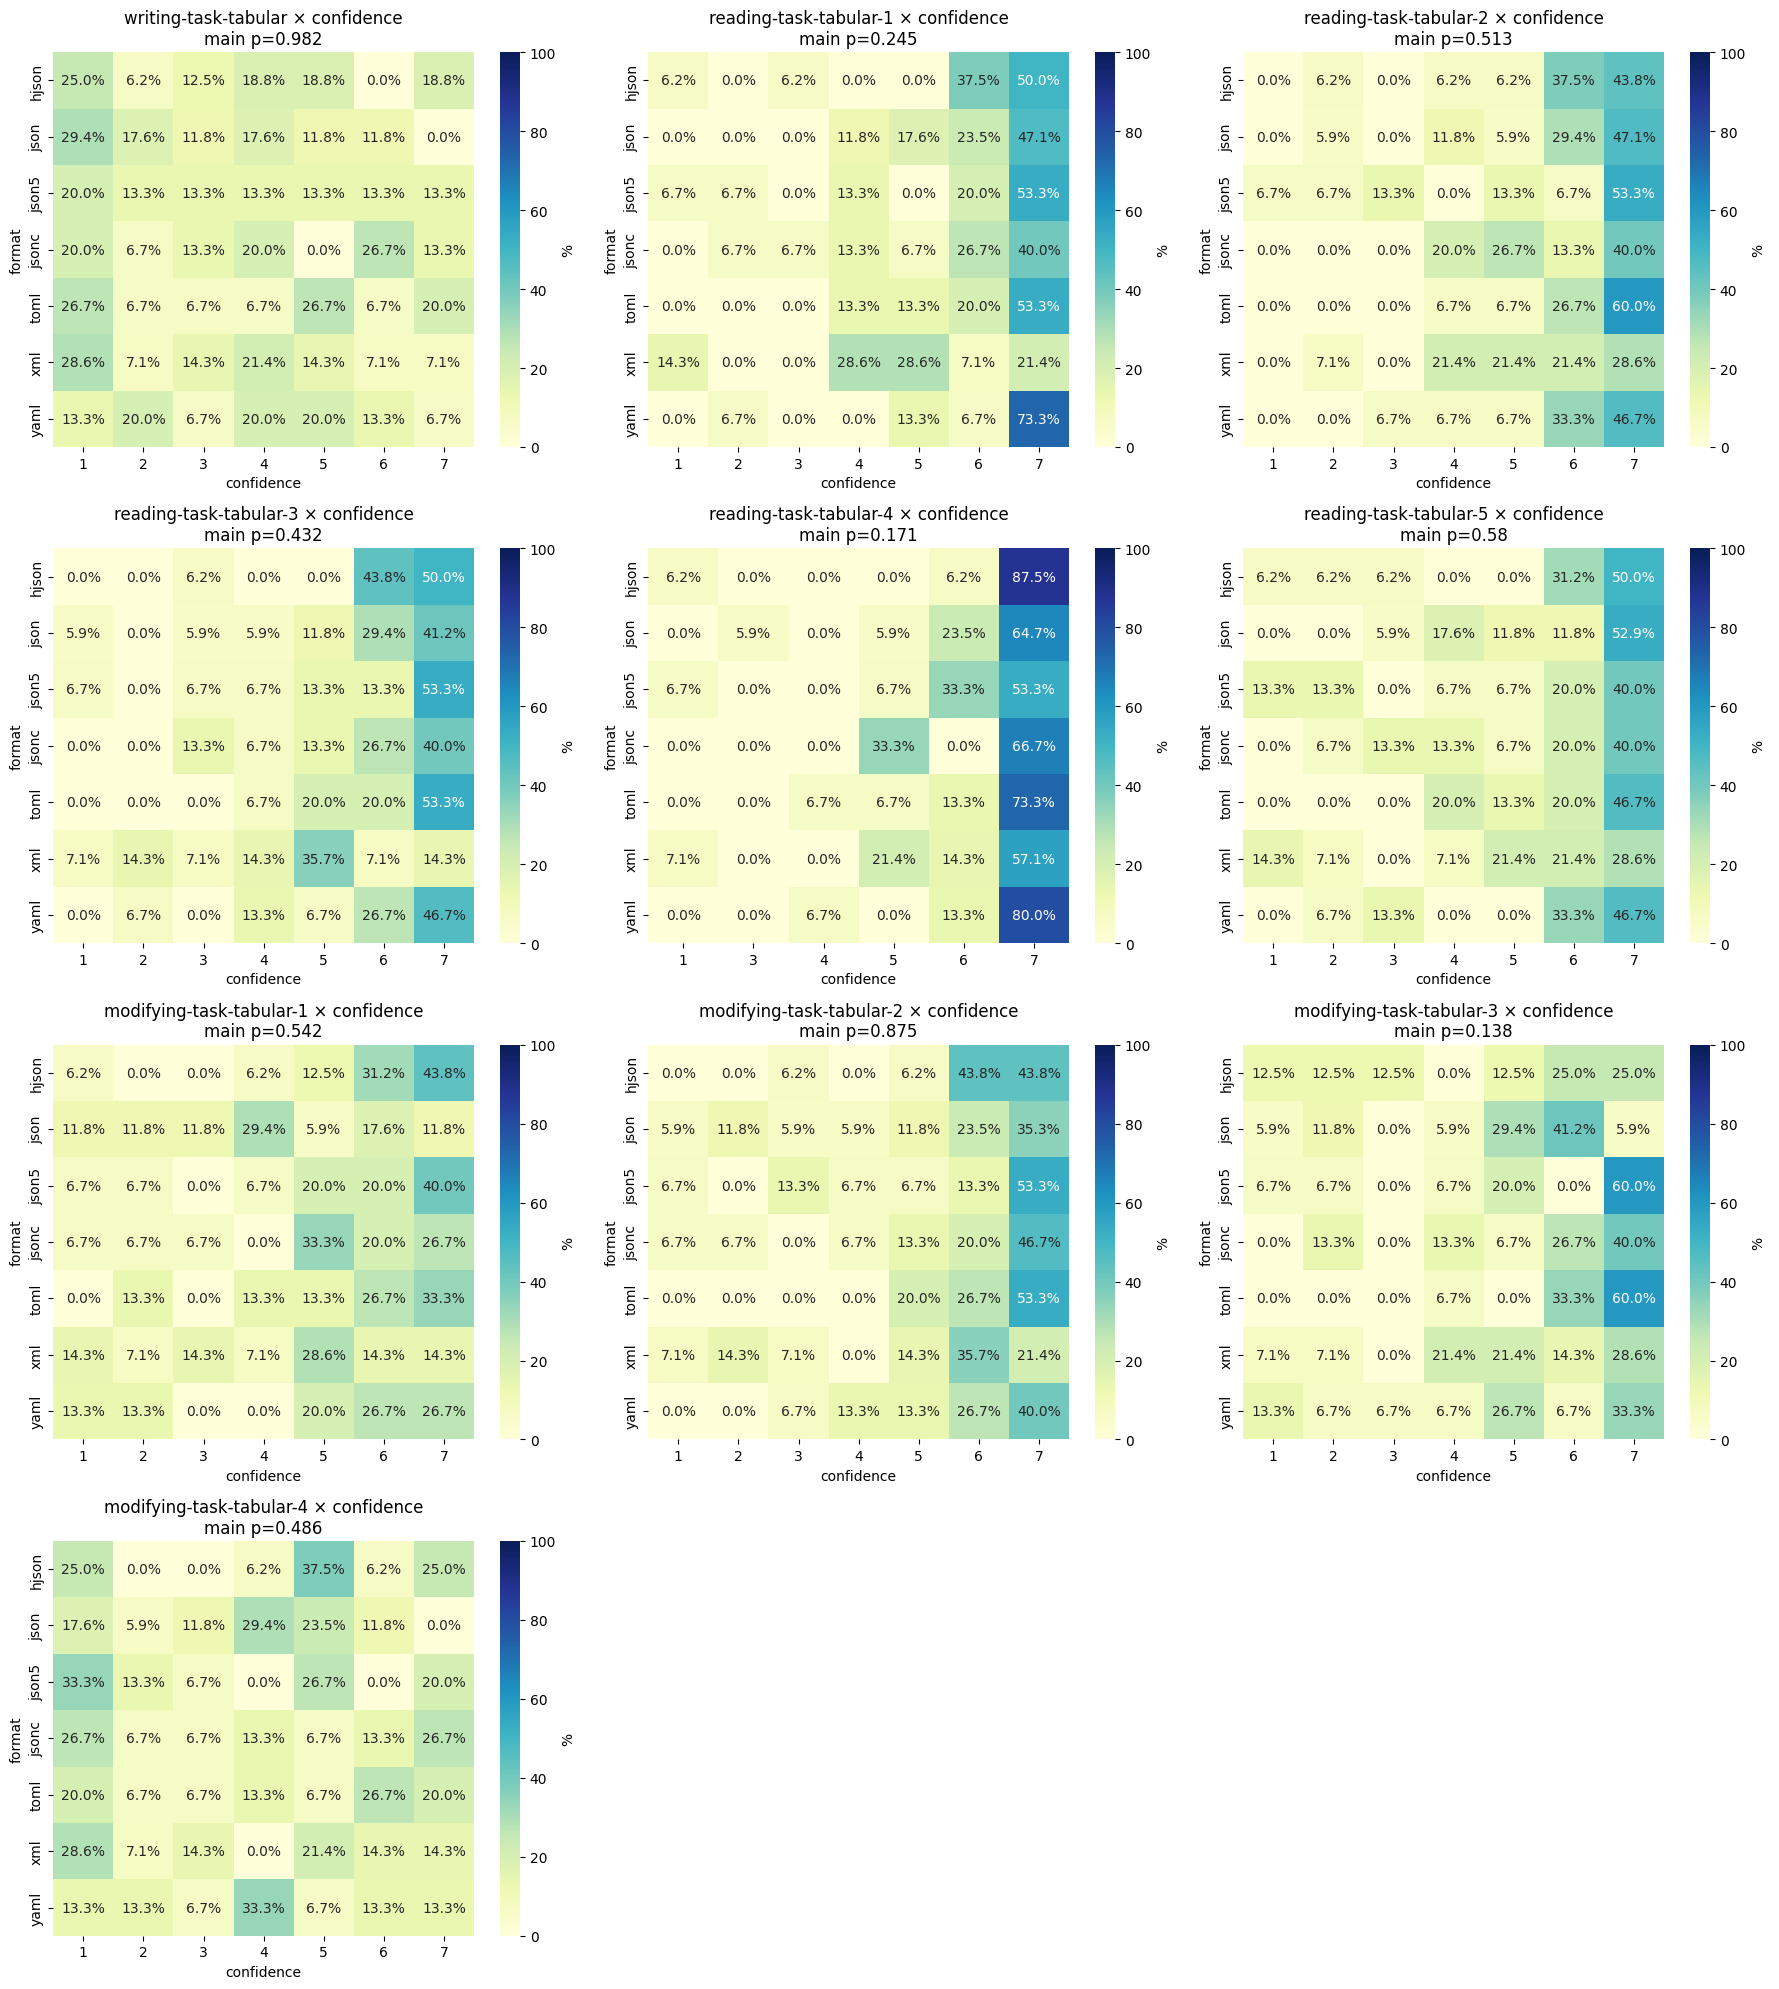

In [105]:
fig, posthoc = compare_tasks_across_formats(
    df=dif_conf_result,
    task_list=['writing-task-tabular','reading-task-tabular-1','reading-task-tabular-2','reading-task-tabular-3','reading-task-tabular-4','reading-task-tabular-5','modifying-task-tabular-1','modifying-task-tabular-2','modifying-task-tabular-3','modifying-task-tabular-4'],
    compare_values=['confidence'],  # 传入一个或多个指标
    data_type='categorical',      # continuous 或 'categorical'
    test_type='auto',
    alpha=0.05,
    correction_method='holm'
)

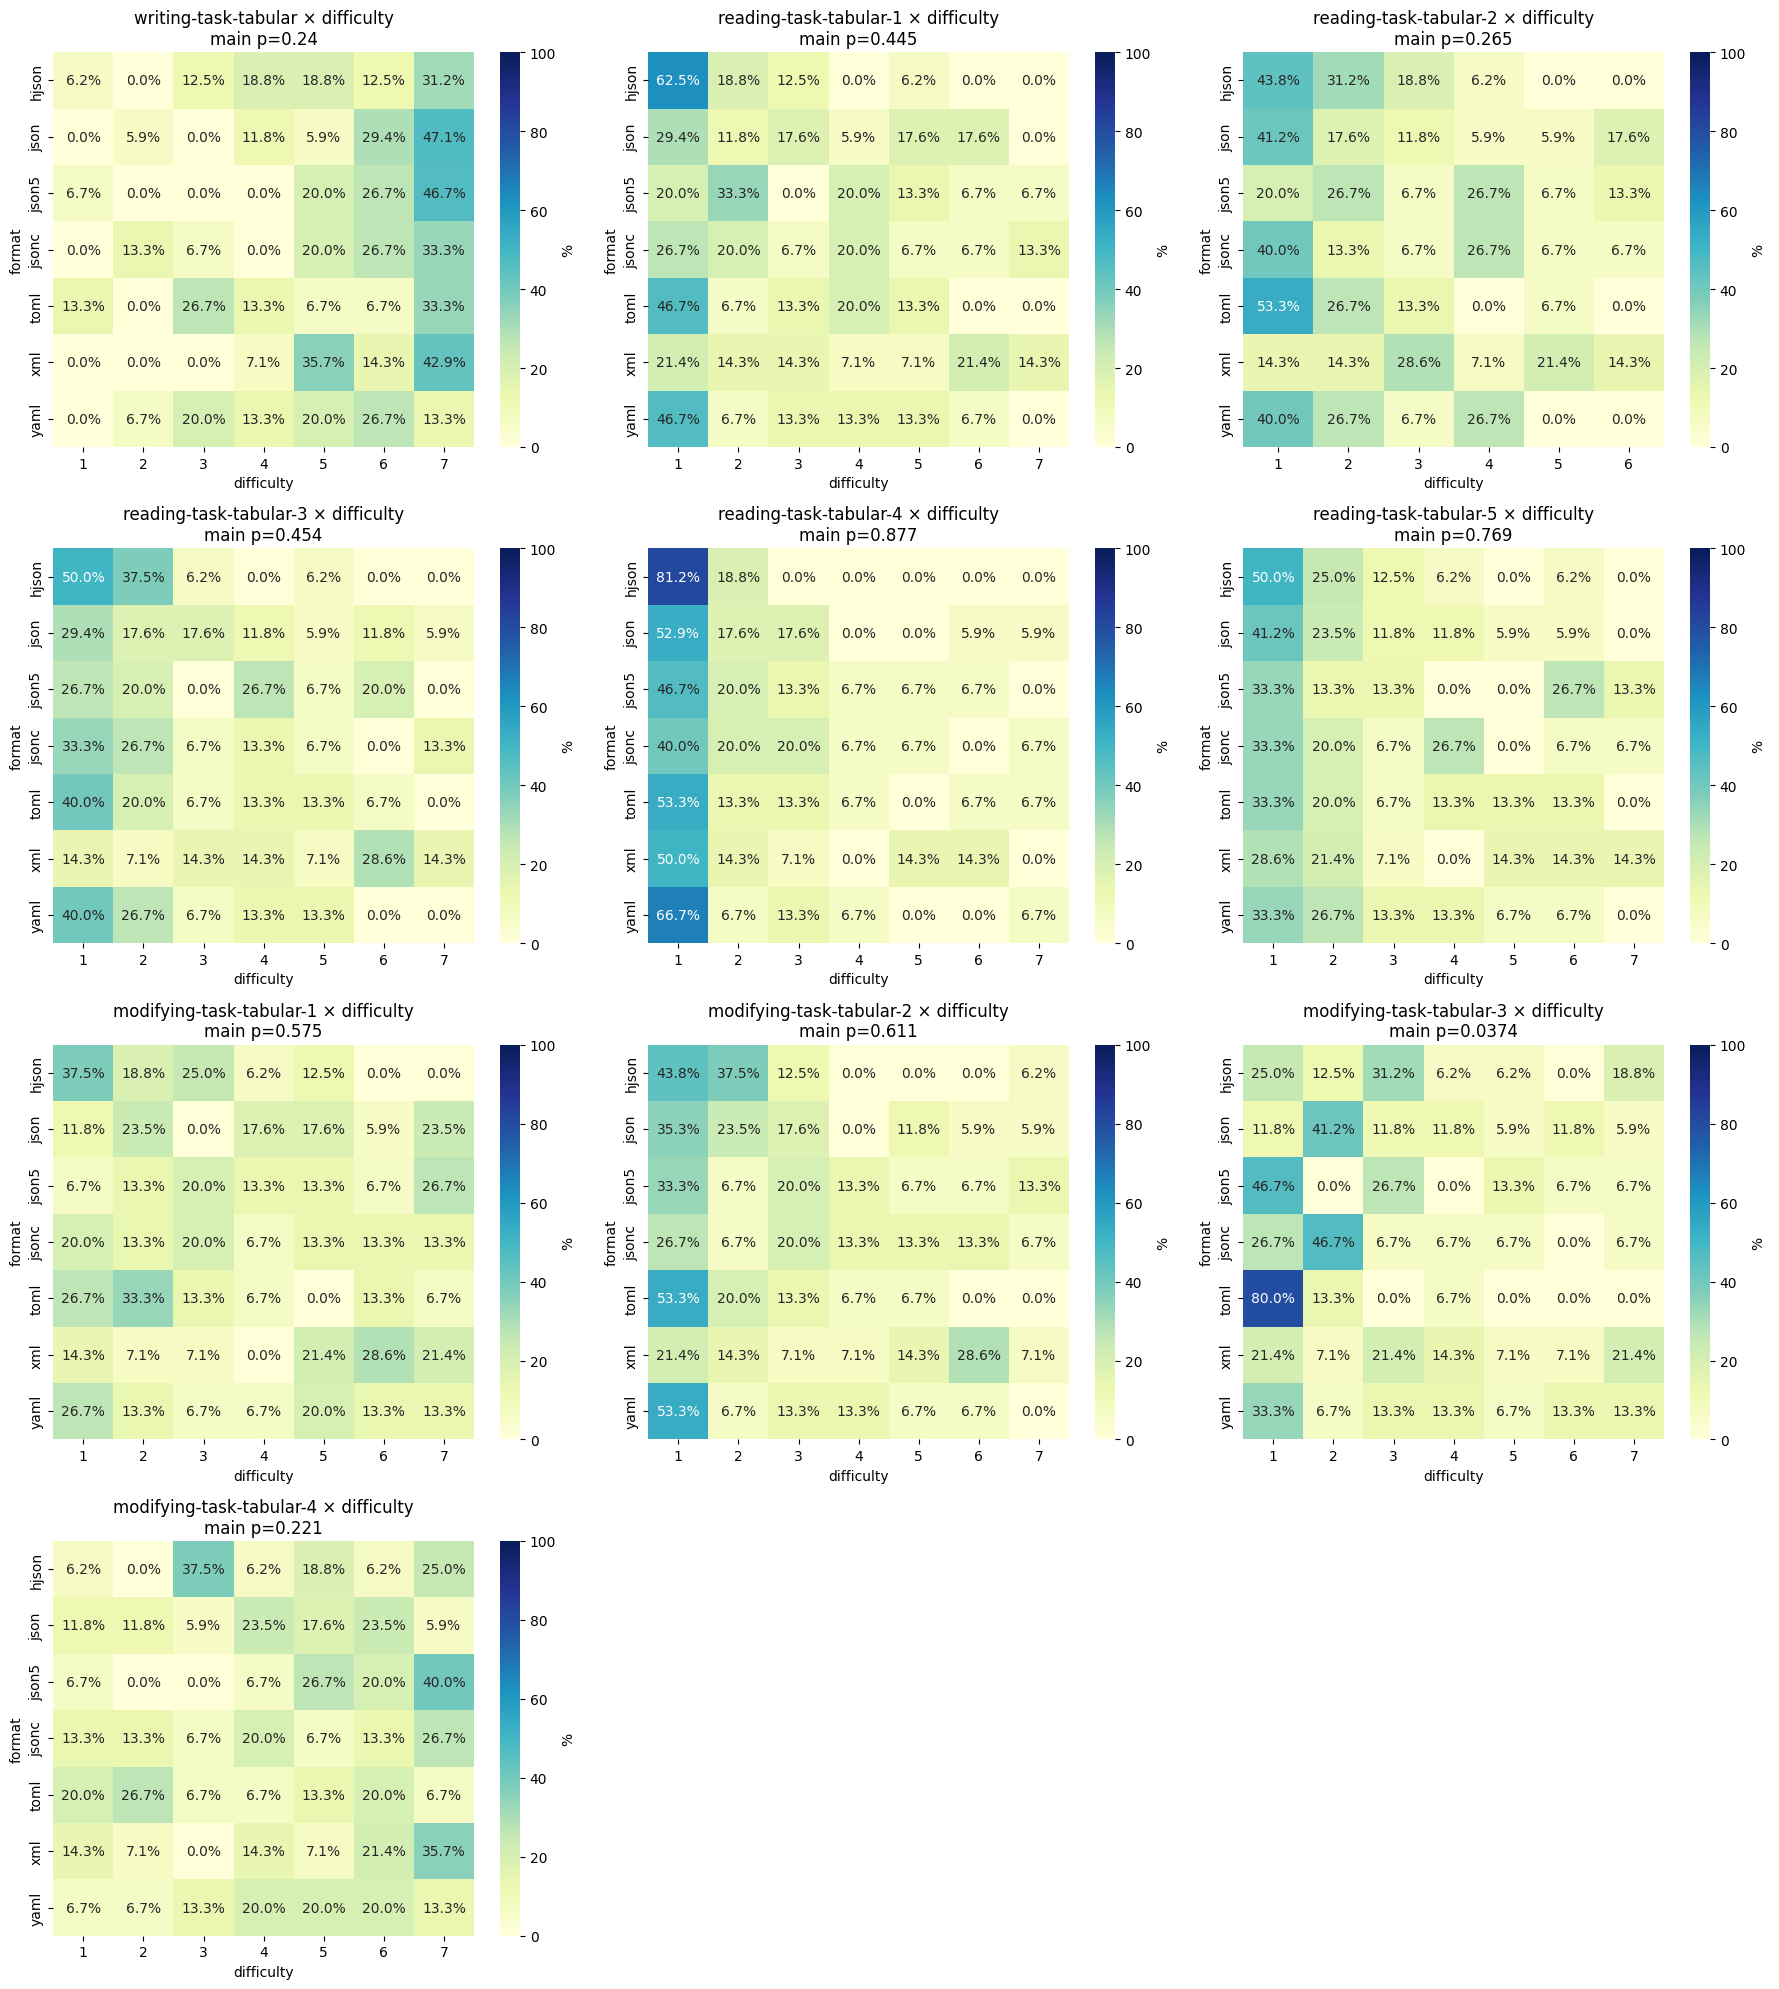

In [106]:
fig, posthoc = compare_tasks_across_formats(
    df=dif_conf_result,
    task_list=['writing-task-tabular','reading-task-tabular-1','reading-task-tabular-2','reading-task-tabular-3','reading-task-tabular-4','reading-task-tabular-5','modifying-task-tabular-1','modifying-task-tabular-2','modifying-task-tabular-3','modifying-task-tabular-4'],
    compare_values=['difficulty'],  # 传入一个或多个指标
    data_type='categorical',      # continuous 或 'categorical'
    test_type='auto',
    alpha=0.05,
    correction_method='holm'
)

In [44]:
wide_dif_conf_result_c = pivot_scores(dif_conf_result,participant_col='participantId',format_col='format',task_col='task',value_col='confidence')
wide_dif_conf_result_d = pivot_scores(dif_conf_result,participant_col='participantId',format_col='format',task_col='task',value_col='difficulty')

d_global=total_score_global_then_group(wide_dif_conf_result_d,total_col='difficutly_total')
c_global=total_score_global_then_group(wide_dif_conf_result_c,total_col='confidence_total')
d_global_result=d_global[['participantId','format','difficutly_total']]
c_global_result=c_global[['participantId','format','confidence_total']]
d_global_result['task']='total'
c_global_result['task']='total'
d_global_result

/var/folders/z4/3vn4jgtj71n_hdpgm6b1r_ww0000gp/T/ipykernel_26541/2315014755.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_global_result['task']='total'
/var/folders/z4/3vn4jgtj71n_hdpgm6b1r_ww0000gp/T/ipykernel_26541/2315014755.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_global_result['task']='total'


participantId format  difficutly_total   task
0    56cb8858edf8da000b6df354  hjson          0.028986  total
1    57c357770e6a1f00015f6038   json          0.516046  total
2    5b68c9eb87af310001584803  json5          0.214769  total
3    5c6414540821d30001046198  hjson          0.257212  total
4    5d30dfa68b1523000134878f   json          0.072464  total
..                        ...    ...               ...    ...
102  67f1a4f8dd44e7cd5adffa29  json5          0.713492  total
103  67f1c7bd6f1c4a3d8deae02f   toml          0.064700  total
104  67f3619e16d4ca195fbd1bd0   yaml          0.254796  total
105  67f5bb69760b211cdfe8021c  jsonc          0.504900  total
106  67f913a9b5c79e960807c7e3   yaml          0.250518  total

[107 rows x 4 columns]

In [45]:
fig, posthoc = compare_tasks_across_formats(
    df=d_global_result,
    task_list=['total'],
    compare_values=['difficutly_total'],  # 传入一个或多个指标
    data_type='continuous',      # continuous 或 'categorical'
    test_type='auto',
    alpha=0.05,
    correction_method='holm'
)

In [46]:
fig, posthoc = compare_tasks_across_formats(
    df=c_global_result,
    task_list=['total'],
    compare_values=['confidence_total'],  # 传入一个或多个指标
    data_type='continuous',      # continuous 或 'categorical'
    test_type='auto',
    alpha=0.05,
    correction_method='holm'
)

#### post survey

In [47]:
post_result['task']='total'
post_result

Unnamed: 0             participantId format  \
0             0  64457bc906c125cebd4bf66b  json5   
1             1  6697c8b6d9d7baa7edd8c4d3  hjson   
2             2  67e25388d573ec2d5f1c8442   yaml   
3             3  67e5cf90b79d0874e1cf16b0   toml   
4             4  67d00f24466a67ba7e41228e   toml   
..          ...                       ...    ...   
102         102  67ab650c320eccf6141d4010  jsonc   
103         103  65fad673a546ab14baf2f8d3  json5   
104         104  67f1c7bd6f1c4a3d8deae02f   toml   
105         105  67adb27bd5f5776fcb16da62  hjson   
106         106  6675c40cdc52b37294f0514e  hjson   

                                                    q7  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3    I carefully followed every task by manually re...   
4                                                  NaN   
..                                                 ...   
102                                                NaN   
103                                                NaN   
104                                                 No   
105                                                 No   
106                                                NaN   

                                                    q8           q9  \
0                                                  NaN  High School   
1                                                  NaN     Master's   
2                                                  NaN   Bachelor's   
3                                                   No   Bachelor's   
4                                                  NaN     Master's   
..                                                 ...          ...   
102                                                NaN     Master's   
103                                                 no     Master's   
104                                                 No     Master's   
105  I found this difficult and I tried my best to ...   Bachelor's   
106                                                NaN   Bachelor's   

                                                   q12  \
0    {'JSON': 'Not familiar at all', 'JSONC': 'Not ...   
1    {'JSON': 'Heard of it but never used', 'JSONC'...   
2    {'JSON': 'Not familiar at all', 'JSONC': 'Used...   
3    {'JSON': 'Used it a few times', 'JSONC': 'Hear...   
4    {'JSON': 'Heard of it but never used', 'JSONC'...   
..                                                 ...   
102  {'JSON': 'Expert', 'JSONC': 'Used it a few tim...   
103  {'JSON': 'Heard of it but never used', 'JSONC'...   
104  {'JSON': 'Expert', 'JSONC': 'Comfortable using...   
105  {'JSON': 'Used it a few times', 'JSONC': 'Hear...   
106  {'JSON': 'Heard of it but never used', 'JSONC'...   

                                                   q13  \
0    ['No, I do not have any cognitive-related cond...   
1    ['No, I do not have any cognitive-related cond...   
2    ['No, I do not have any cognitive-related cond...   
3    ['No, I do not have any cognitive-related cond...   
4    ['No, I do not have any cognitive-related cond...   
..                                                 ...   
102  ['Dyslexia (e.g., difficulty reading or distin...   
103  ['No, I do not have any cognitive-related cond...   
104  ['No, I do not have any cognitive-related cond...   
105  ['No, I do not have any cognitive-related cond...   
106  ['No, I do not have any cognitive-related cond...   

                                                   q14   q10  \
0        ['No, I do not have any related conditions.']   0.0   
1        ['No, I do not have any related conditions.']  12.0   
2        ['No, I do not have any related conditions.']   2.0   
3        ['No, I do not have any related conditions.']  41.0   
4        ['No, I do not have any related conditions.']  20.0   
..                                                 .

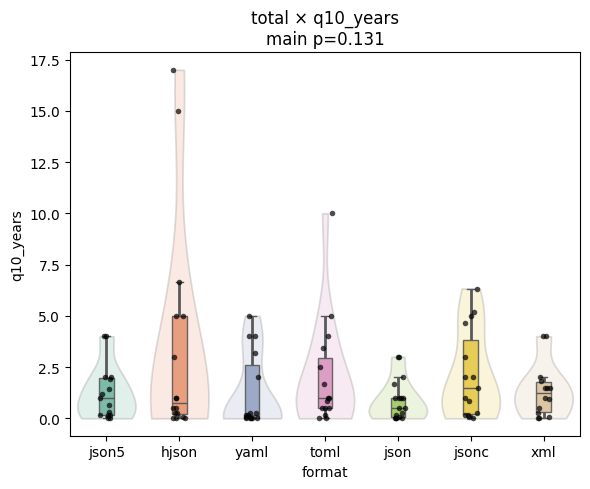

In [48]:
fig, posthoc = compare_tasks_across_formats(
    df=post_result,
    task_list=['total'],
    compare_values=['q10_years'],  # 传入一个或多个指标
    data_type='continuous',      # continuous 或 'categorical'
    test_type='auto',
    alpha=0.05,
    correction_method='holm'
)

/Users/shiyi.he/Desktop/DSF_Analysis/DataProcess/visualization.py:159: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


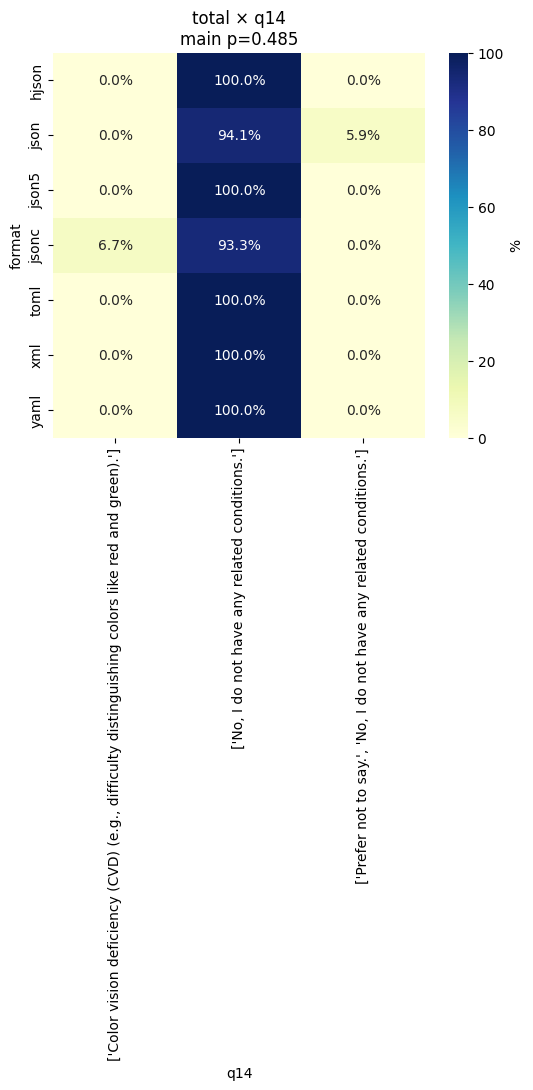

In [49]:
fig, posthoc = compare_tasks_across_formats(
    df=post_result,
    task_list=['total'],
    compare_values=['q14'],  # 传入一个或多个指标
    data_type='categorical',      # continuous 或 'categorical'
    test_type='auto',
    alpha=0.05,
    correction_method='holm'
)

/Users/shiyi.he/Desktop/DSF_Analysis/DataProcess/visualization.py:159: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


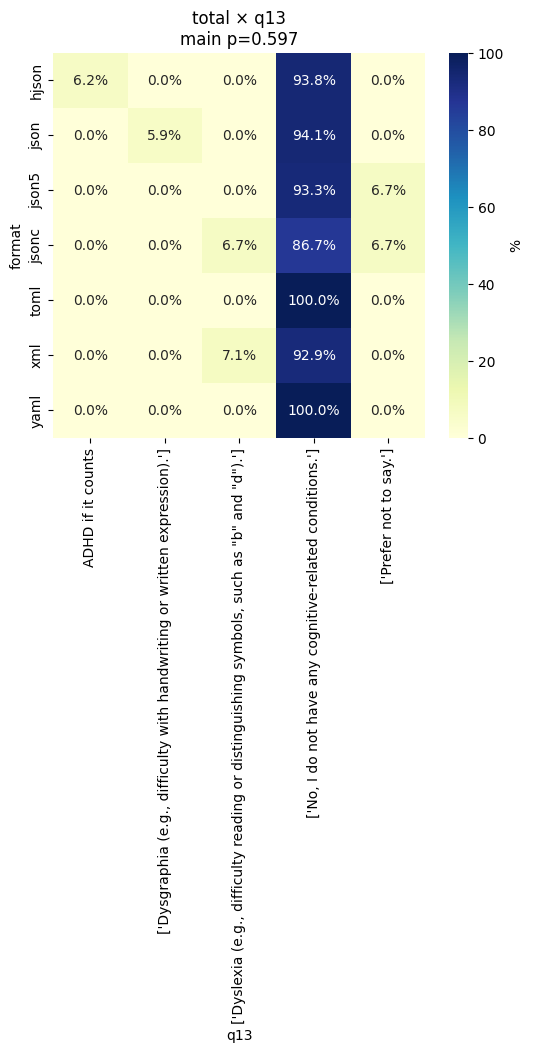

In [50]:
fig, posthoc = compare_tasks_across_formats(
    df=post_result,
    task_list=['total'],
    compare_values=['q13'],  # 传入一个或多个指标
    data_type='categorical',      # continuous 或 'categorical'
    test_type='auto',
    alpha=0.05,
    correction_method='holm'
)

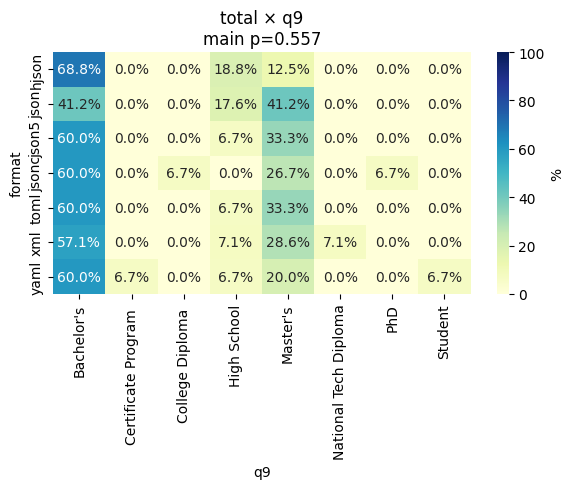

In [51]:
fig, posthoc = compare_tasks_across_formats(
    df=post_result,
    task_list=['total'],
    compare_values=['q9'],  # 传入一个或多个指标
    data_type='categorical',      # continuous 或 'categorical'
    test_type='auto',
    alpha=0.05,
    correction_method='holm'
)

In [52]:
# —— 用法示例 —— #
self_fam, wide_fam = extract_familiarity_dfs(post_result)

self_fam['task']='total'
wide_fam['task']='total'

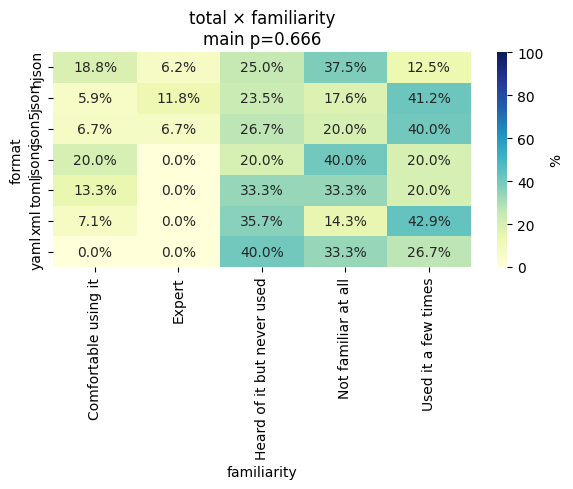

In [53]:
fig, posthoc = compare_tasks_across_formats(
    df=self_fam,
    task_list=['total'],
    compare_values=['familiarity'],  # 传入一个或多个指标
    data_type='categorical',      # continuous 或 'categorical'
    test_type='auto',
    alpha=0.05,
    correction_method='holm'
)

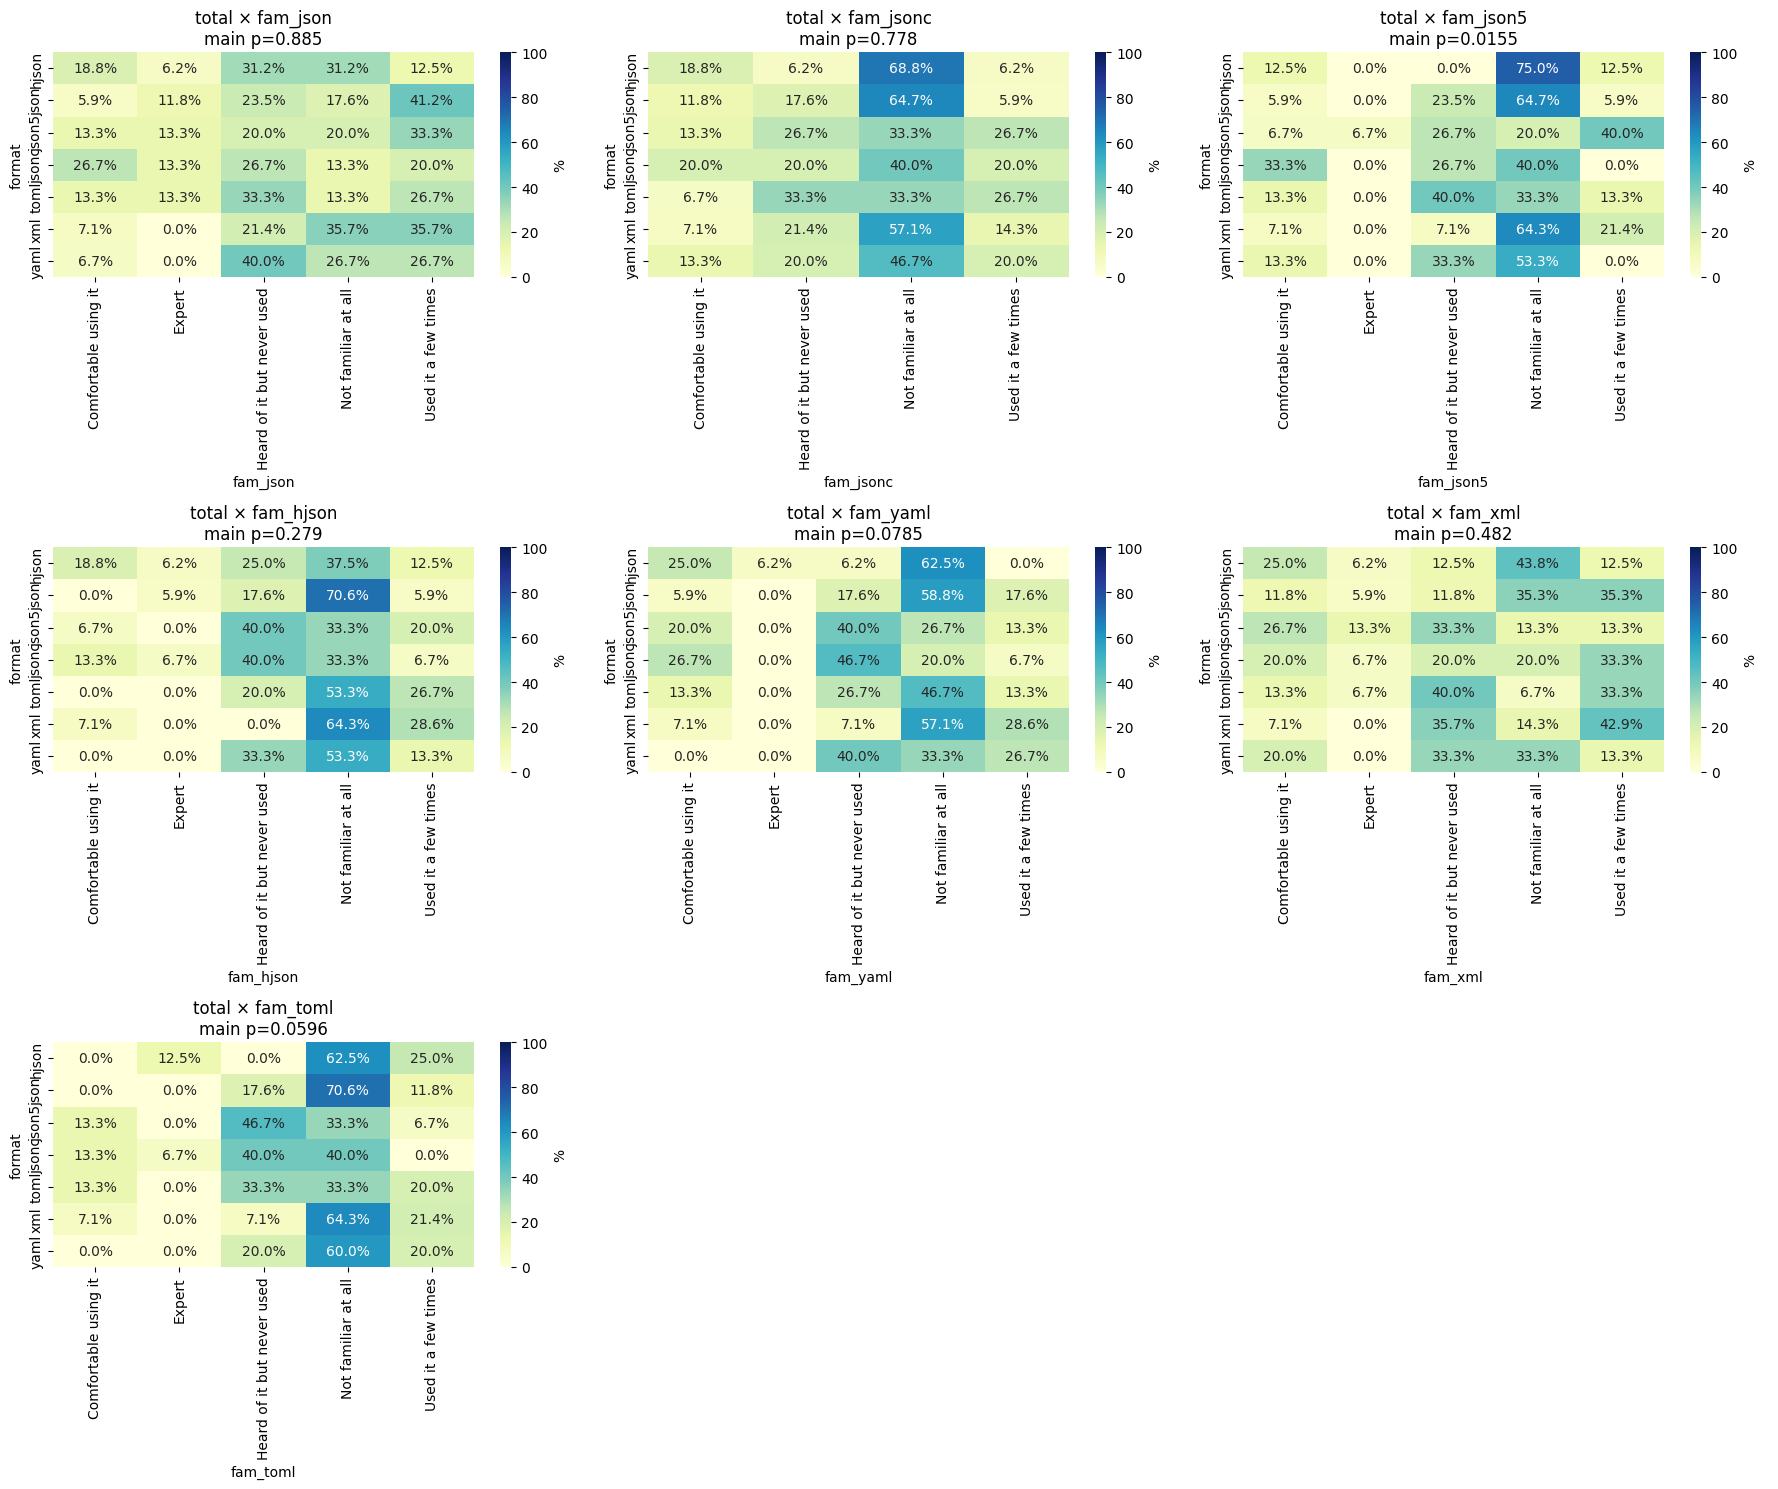

In [54]:
fig, posthoc = compare_tasks_across_formats(
    df=wide_fam,
    task_list=['total'],
    compare_values=['fam_json','fam_jsonc','fam_json5','fam_hjson','fam_yaml','fam_xml','fam_toml'],  # 传入一个或多个指标
    data_type='categorical',      # continuous 或 'categorical'
    test_type='auto',
    alpha=0.05,
    correction_method='holm'
)

### cmd

In [115]:
df_merged = pd.merge(
    d_global_result,
    c_global_result,
    on=["participantId", "format", "task"],
    how="inner"      # 也可以改成 "outer" / "left" / "right" 视你的需求而定
)
df_merged.to_csv('/Users/shiyi.he/Desktop/DSF_Analysis/cd_tabular.csv',index=False)

In [55]:
reading_result_events=reading_result[['participantId','format','task','help_count','search_count','copy_count','paste_count']]
writing_result_events=writing_result[['participantId','format','task','help_count','search_count','copy_count','paste_count']]
modifying_result_events=modifying_result[['participantId','format','task','help_count','search_count','copy_count','paste_count']]

events_result=pd.concat([reading_result_events,writing_result_events,modifying_result_events])
events_result

participantId format                      task  help_count  \
0    64457bc906c125cebd4bf66b  json5    reading-task-tabular-1           0   
1    64457bc906c125cebd4bf66b  json5    reading-task-tabular-2           0   
2    64457bc906c125cebd4bf66b  json5    reading-task-tabular-3           0   
3    64457bc906c125cebd4bf66b  json5    reading-task-tabular-4           0   
4    64457bc906c125cebd4bf66b  json5    reading-task-tabular-5           0   
..                        ...    ...                       ...         ...   
423  6787d648d7b1963c661f9443  json5  modifying-task-tabular-2           0   
424  6787d648d7b1963c661f9443  json5  modifying-task-tabular-4           0   
425  66a662a0a709312db9de01f2  jsonc  modifying-task-tabular-1           0   
426  66a662a0a709312db9de01f2  jsonc  modifying-task-tabular-2           0   
427  67ab650c320eccf6141d4010  jsonc  modifying-task-tabular-3           0   

     search_count  copy_count  paste_count  
0               0           0            0  
1               0           0            0  
2               0           0            0  
3               0           0            0  
4               0           0            0  
..            ...         ...          ...  
423             0           0            0  
424             0           0            0  
425             0           0            0  
426             0           0            0  
427             0           0            0  

[1070 rows x 7 columns]

In [56]:
agg_event = aggregate_interactions(events_result)
agg_event


participantId format     task  help_count  search_count  \
0    56cb8858edf8da000b6df354  hjson  reading           0             0   
1    57c357770e6a1f00015f6038   json  reading           0             0   
2    5b68c9eb87af310001584803  json5  reading           2             0   
3    5c6414540821d30001046198  hjson  reading           0             0   
4    5d30dfa68b1523000134878f   json  reading           0             0   
..                        ...    ...      ...         ...           ...   
423  67f1a4f8dd44e7cd5adffa29  json5    total           0             0   
424  67f1c7bd6f1c4a3d8deae02f   toml    total           0             0   
425  67f3619e16d4ca195fbd1bd0   yaml    total           0             0   
426  67f5bb69760b211cdfe8021c  jsonc    total           0             0   
427  67f913a9b5c79e960807c7e3   yaml    total           3             0   

     copy_count  paste_count  
0             0            0  
1             0            0  
2             0            0  
3             0            0  
4             0            0  
..          ...          ...  
423           0            0  
424          19            9  
425           0            0  
426           0            0  
427           8            0  

[428 rows x 7 columns]

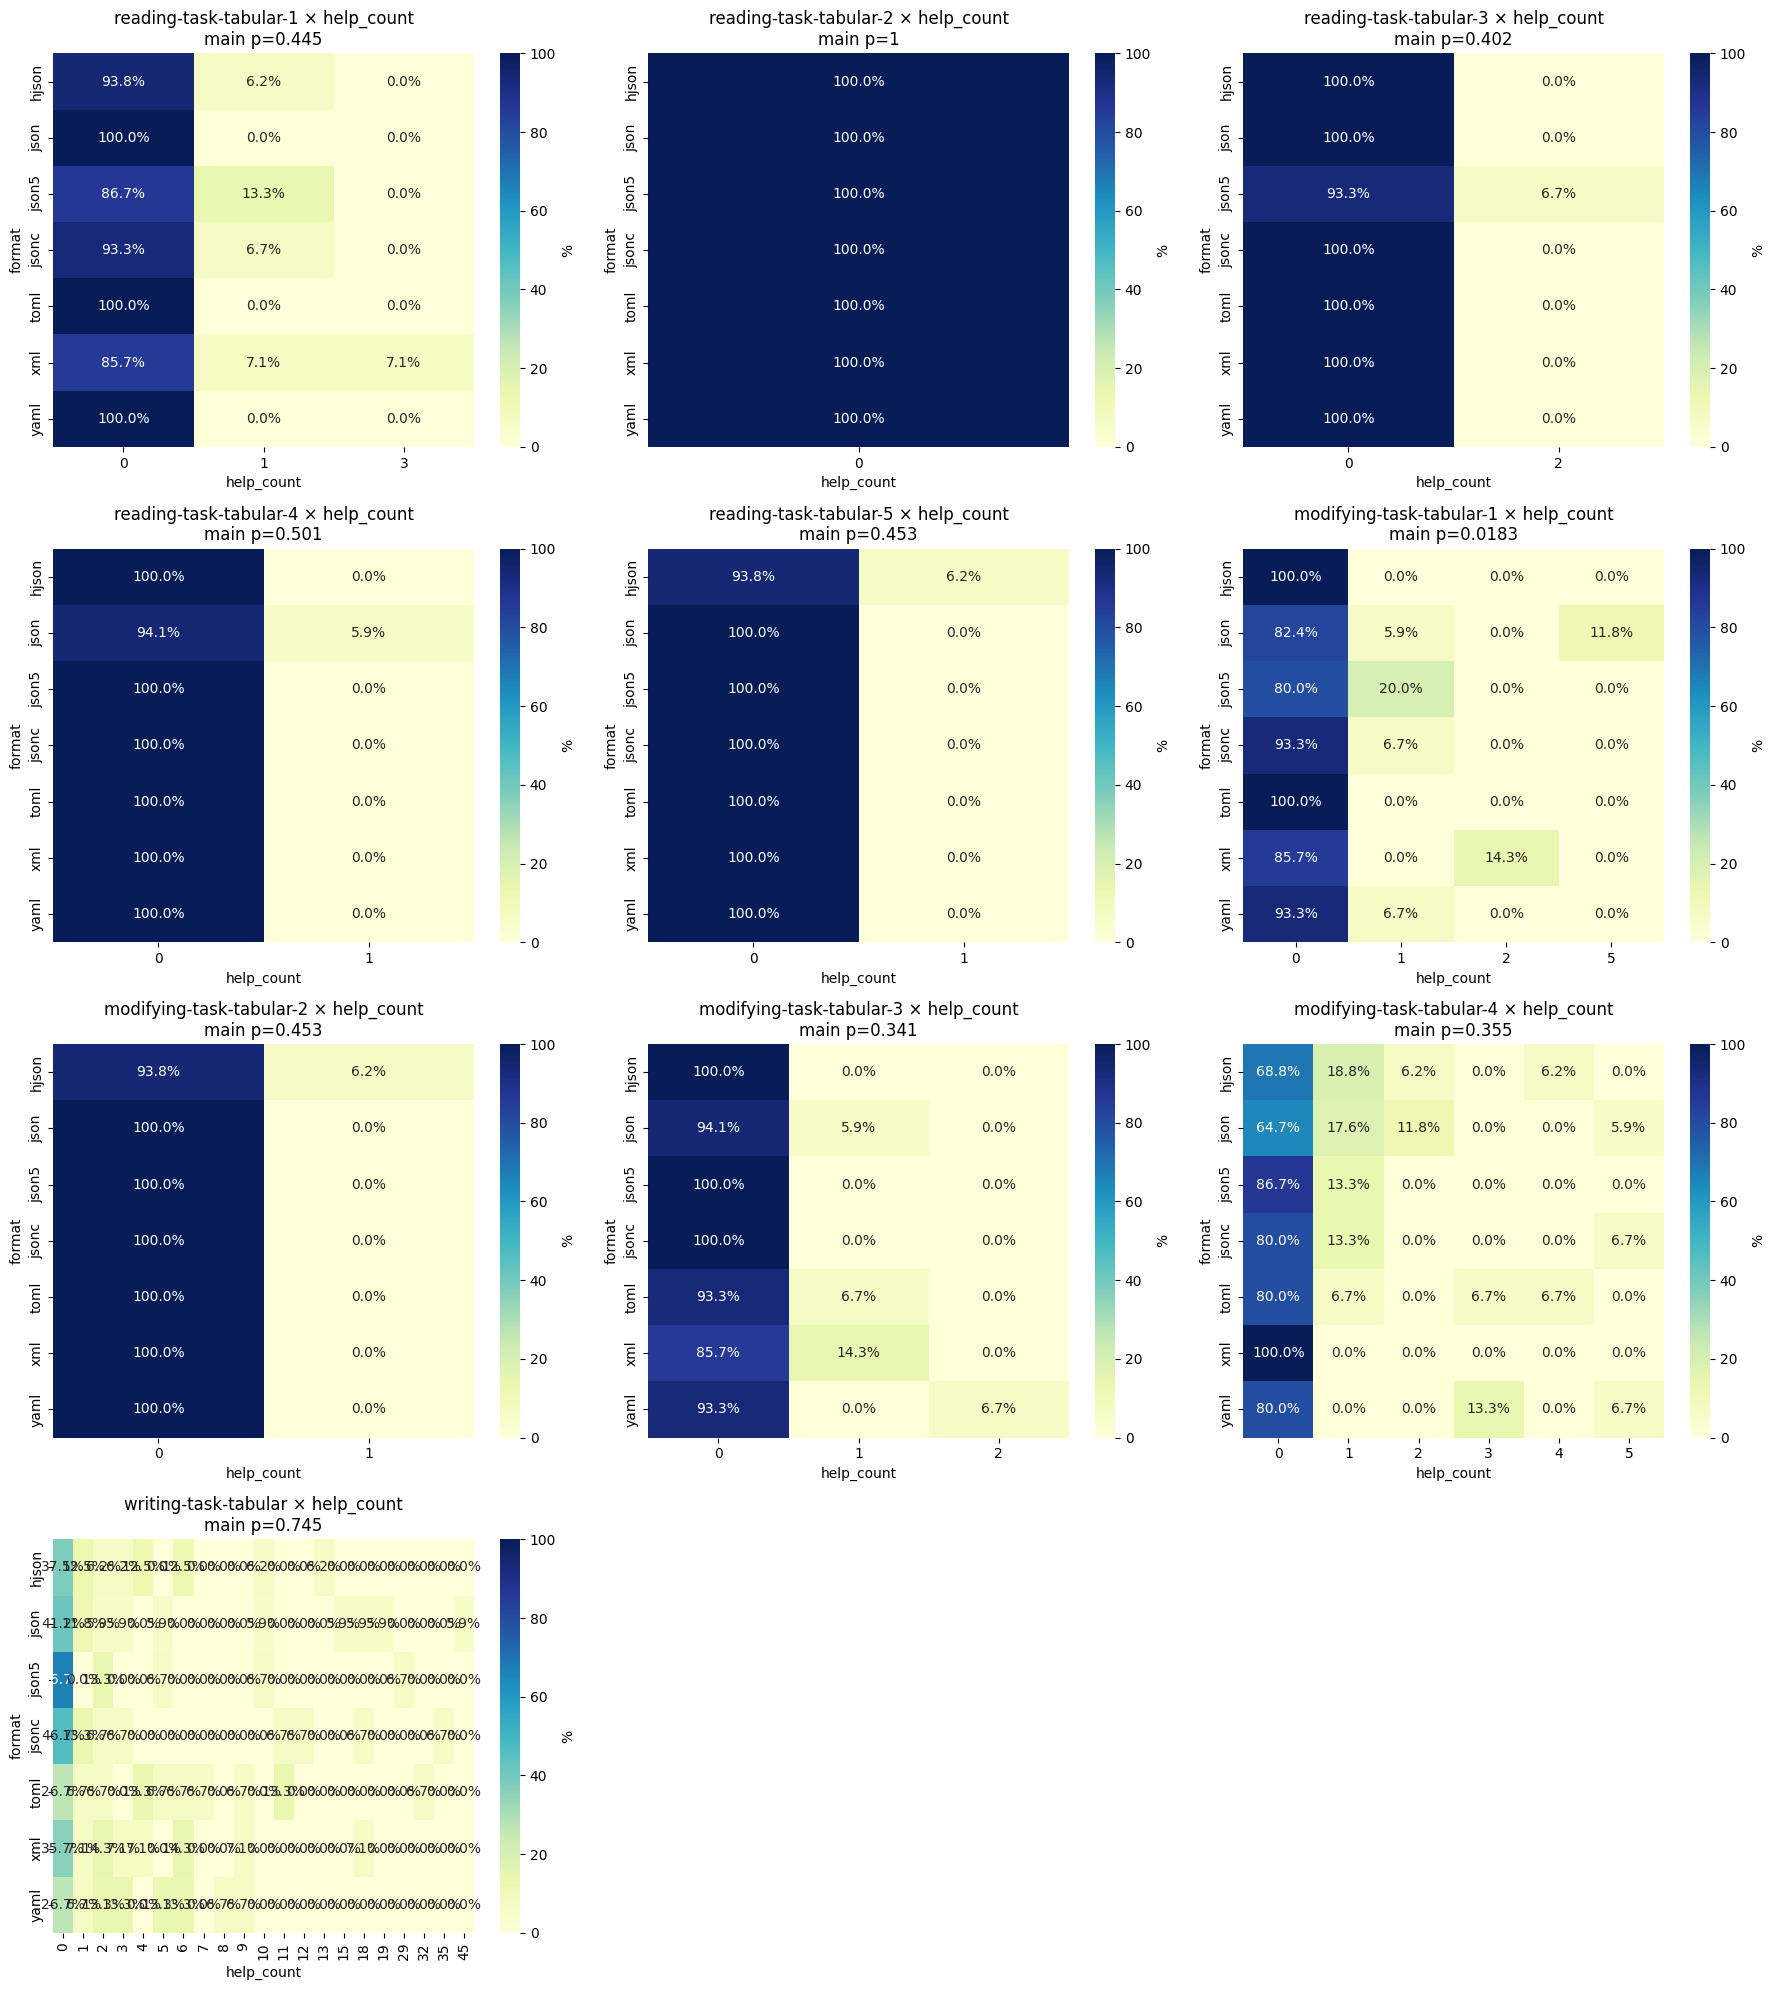

In [57]:
fig, posthoc = compare_tasks_across_formats(
    df=events_result,
    task_list=['reading-task-tabular-1','reading-task-tabular-2','reading-task-tabular-3','reading-task-tabular-4','reading-task-tabular-5','modifying-task-tabular-1','modifying-task-tabular-2','modifying-task-tabular-3','modifying-task-tabular-4','writing-task-tabular'],
    compare_values=['help_count'],  # 传入一个或多个指标
    data_type='categorical',      # continuous 或 'categorical'
    test_type='auto',
    alpha=0.05,
    correction_method='holm'
)

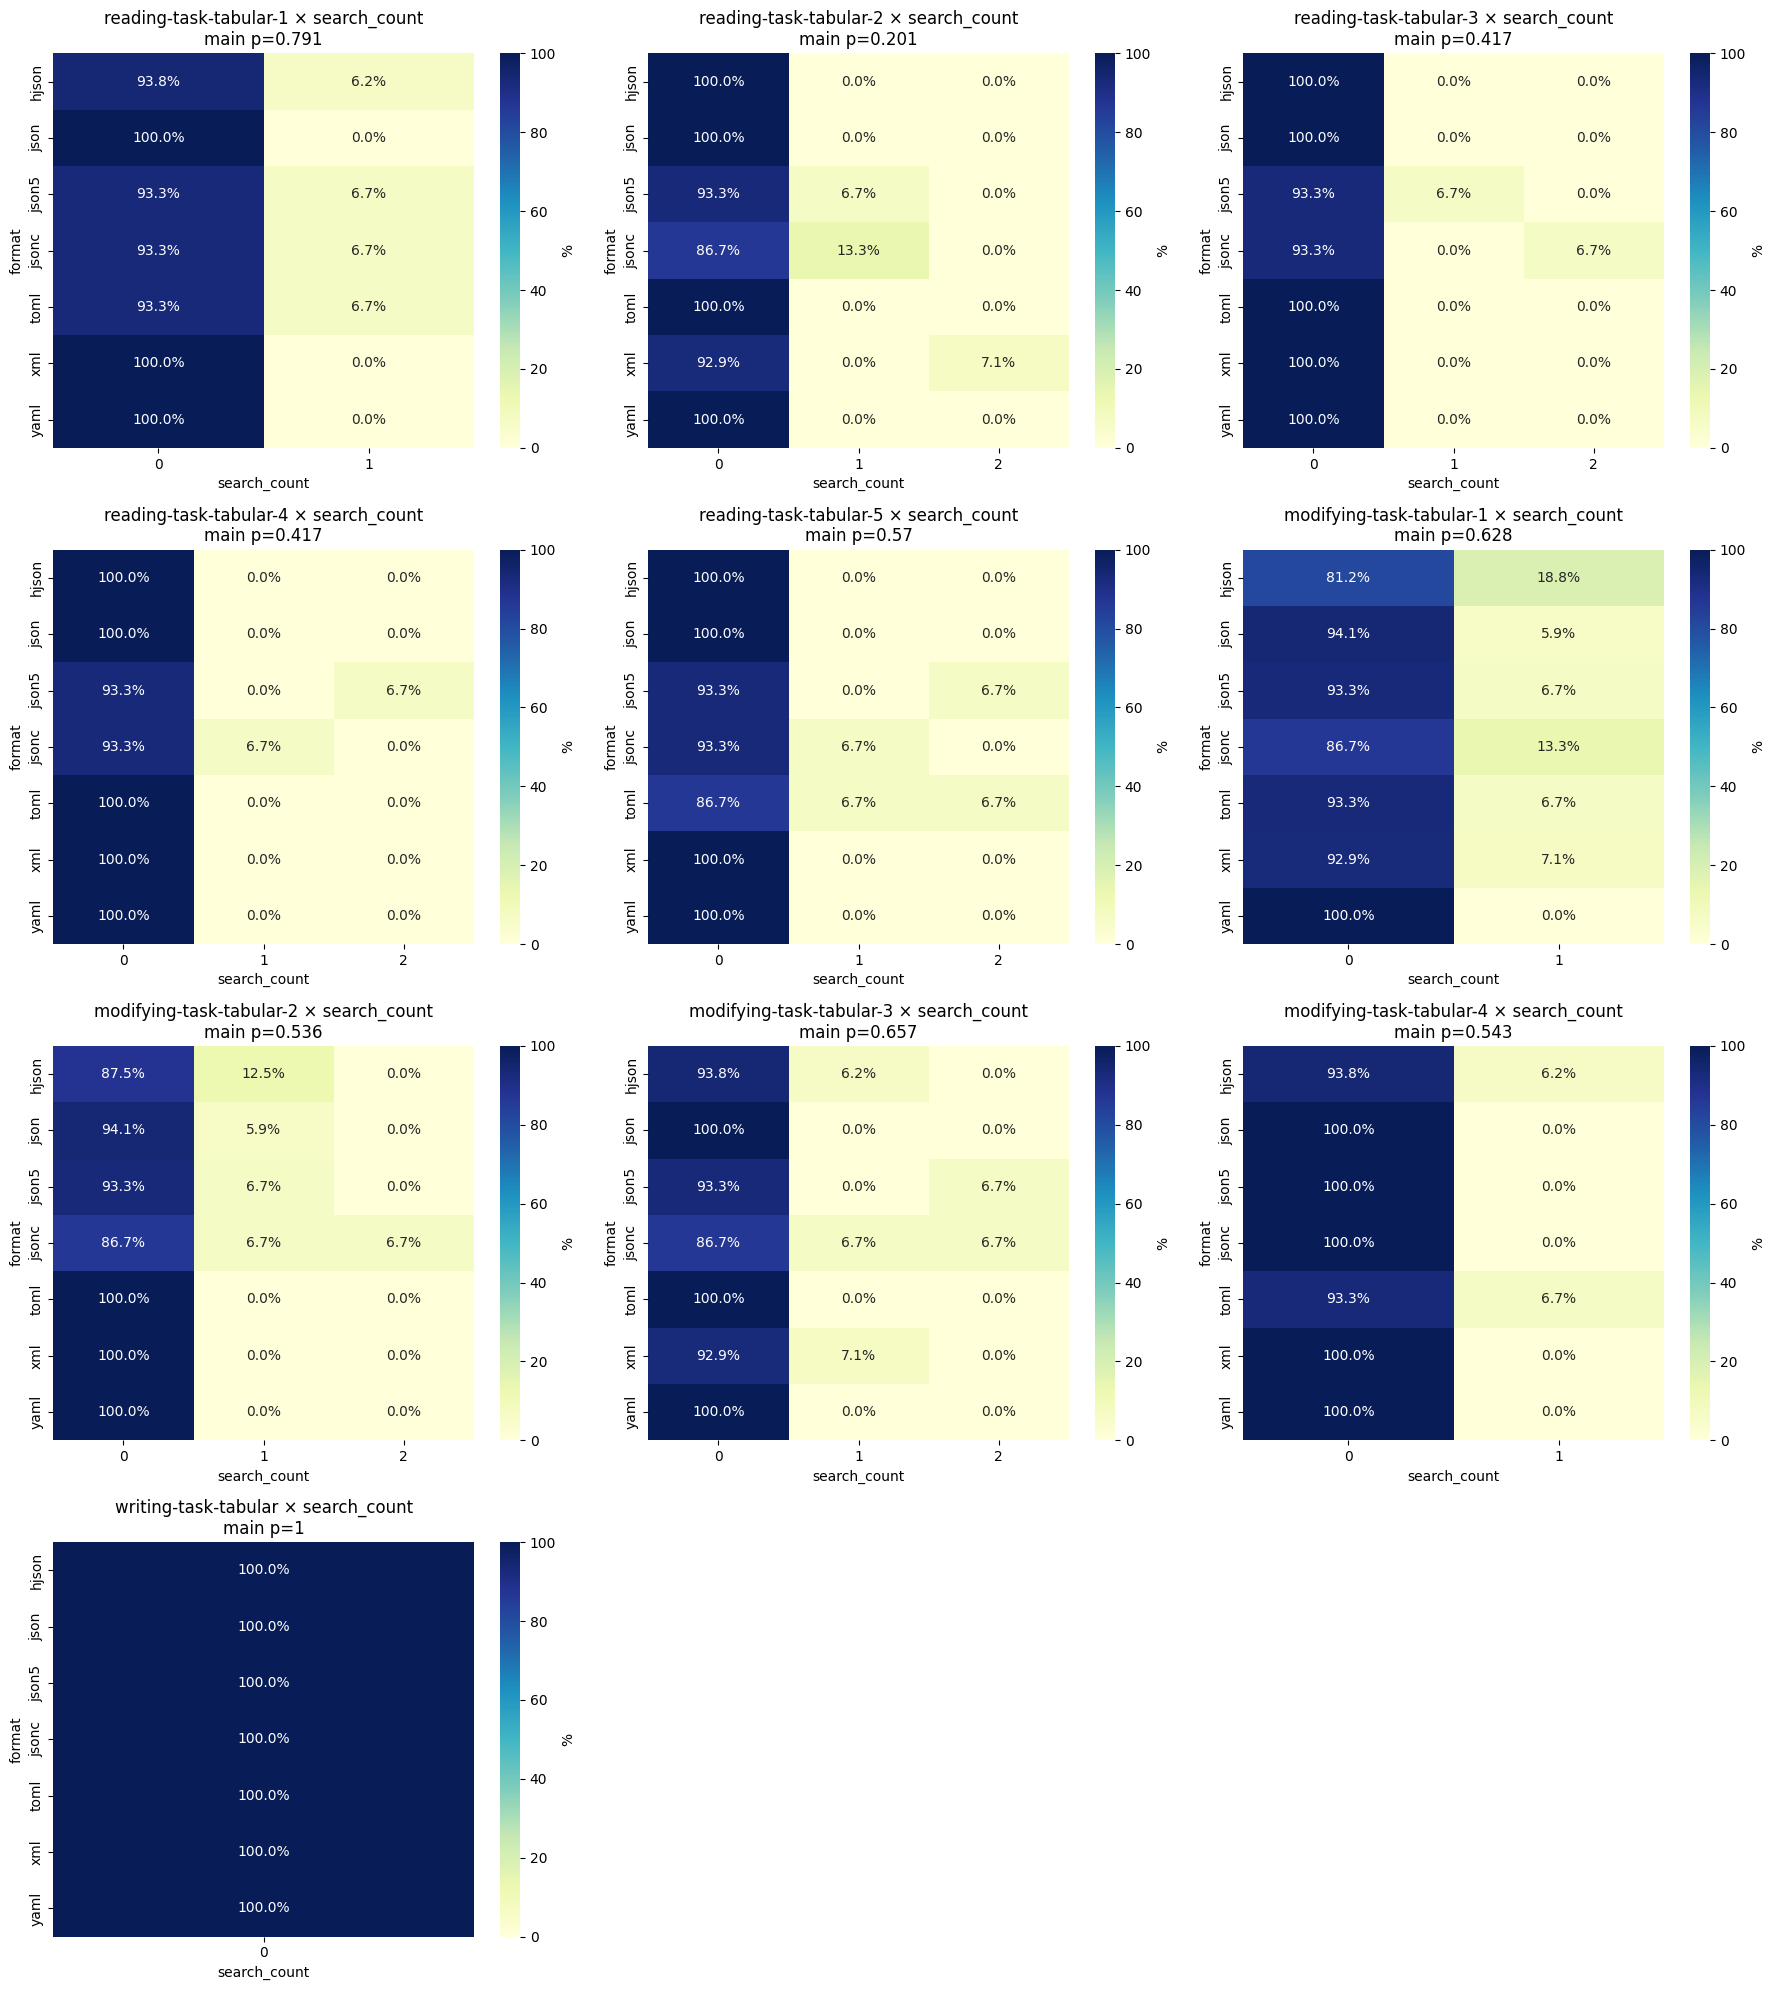

In [58]:
fig, posthoc = compare_tasks_across_formats(
    df=events_result,
    task_list=['reading-task-tabular-1','reading-task-tabular-2','reading-task-tabular-3','reading-task-tabular-4','reading-task-tabular-5','modifying-task-tabular-1','modifying-task-tabular-2','modifying-task-tabular-3','modifying-task-tabular-4','writing-task-tabular'],
    compare_values=['search_count'],  # 传入一个或多个指标
    data_type='categorical',      # continuous 或 'categorical'
    test_type='auto',
    alpha=0.05,
    correction_method='holm'
)

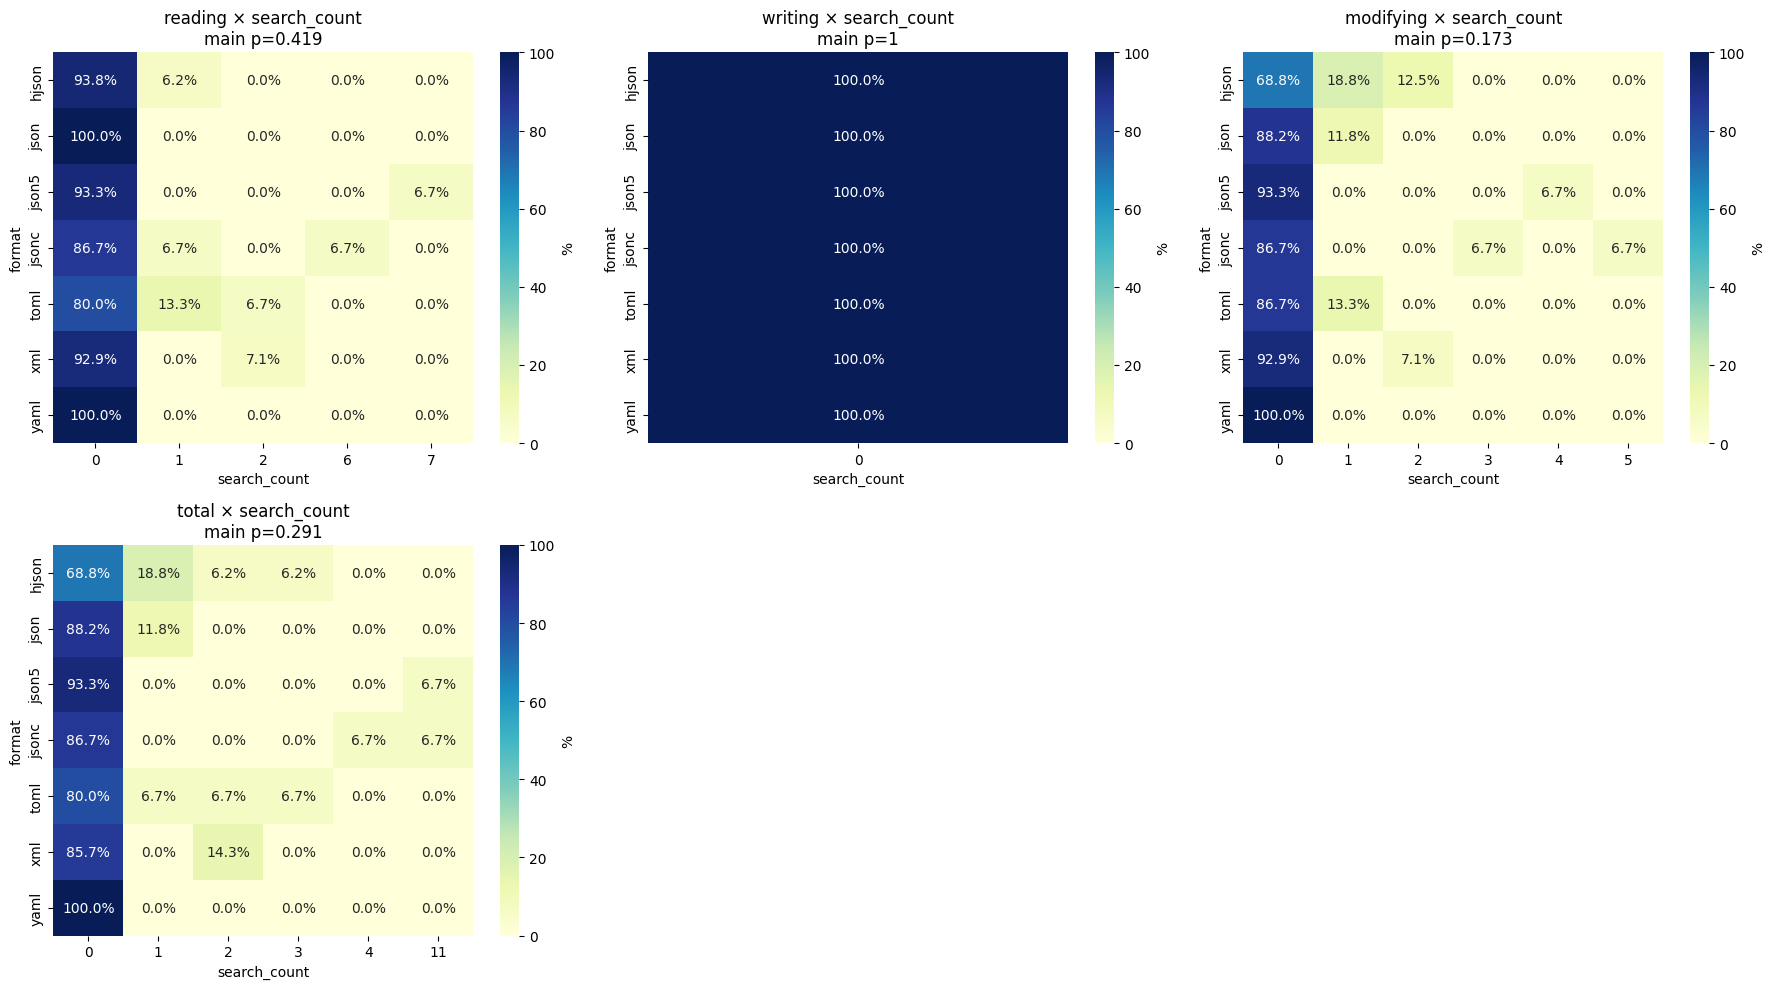

In [59]:
fig, posthoc = compare_tasks_across_formats(
    df=agg_event,
    task_list=['reading','writing','modifying','total'],
    compare_values=['search_count'],  # 传入一个或多个指标
    data_type='categorical',      # continuous 或 'categorical'
    test_type='auto',
    alpha=0.05,
    correction_method='holm'
)

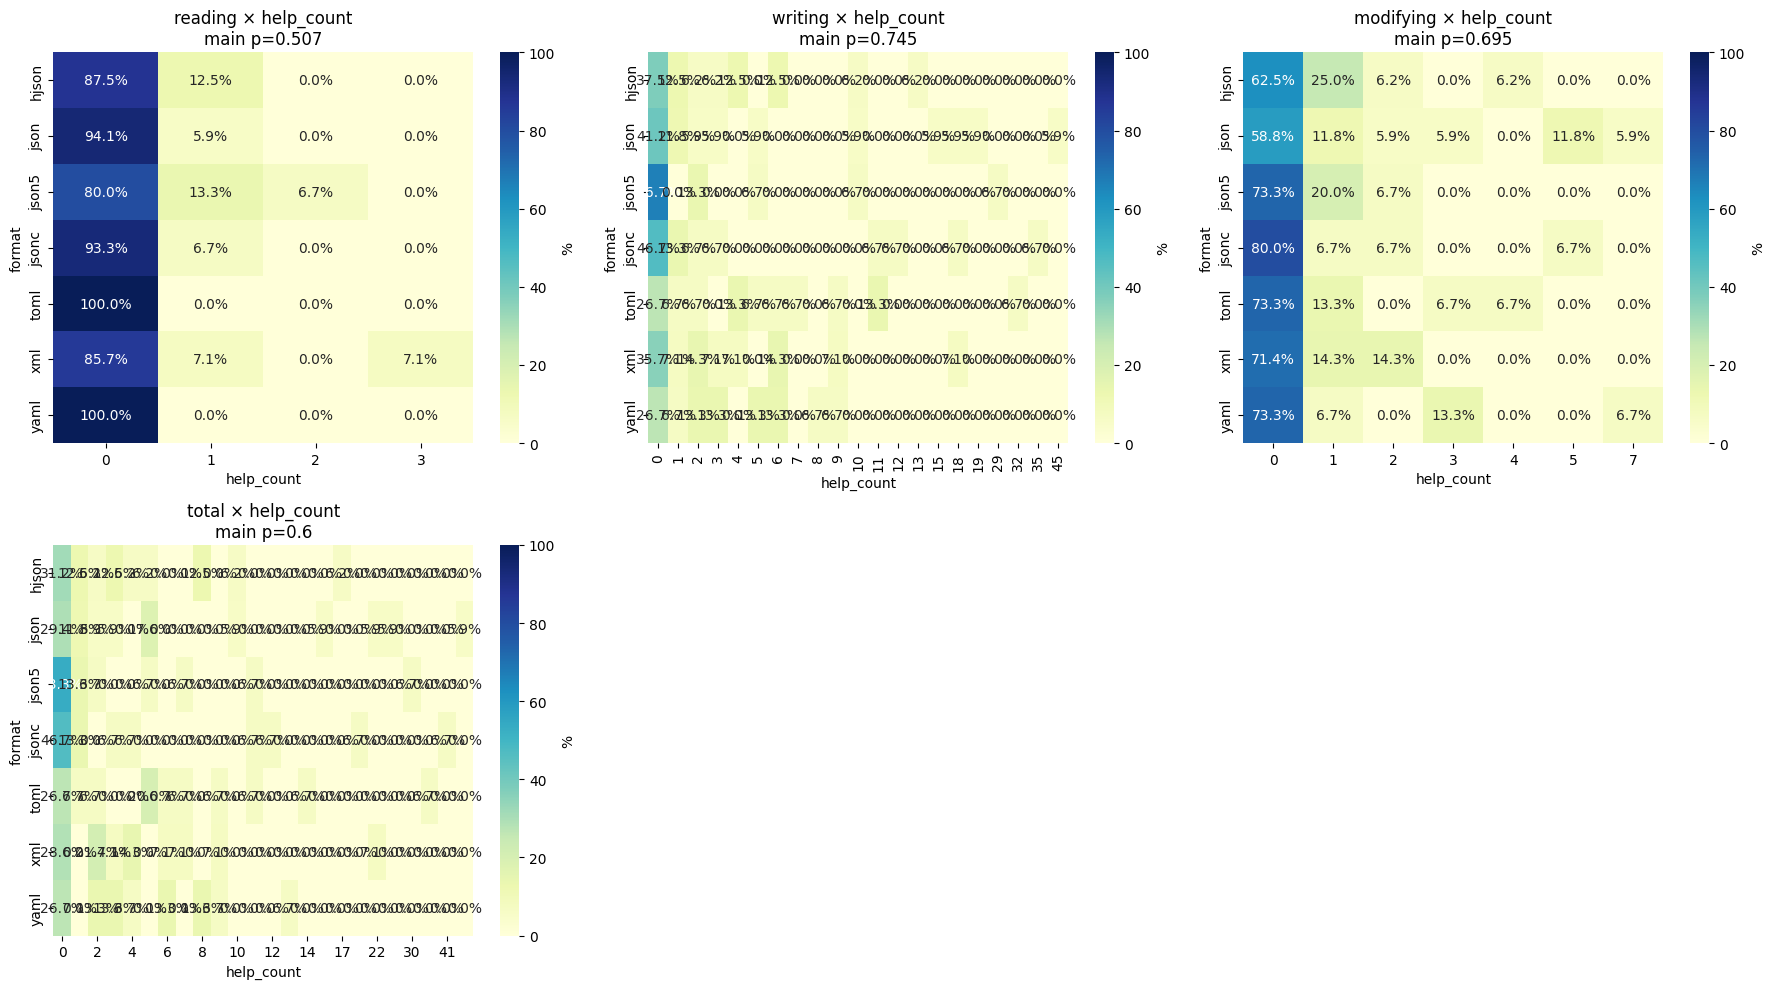

In [60]:
fig, posthoc = compare_tasks_across_formats(
    df=agg_event,
    task_list=['reading','writing','modifying','total'],
    compare_values=['help_count'],  # 传入一个或多个指标
    data_type='categorical',      # continuous 或 'categorical'
    test_type='auto',
    alpha=0.05,
    correction_method='holm'
)

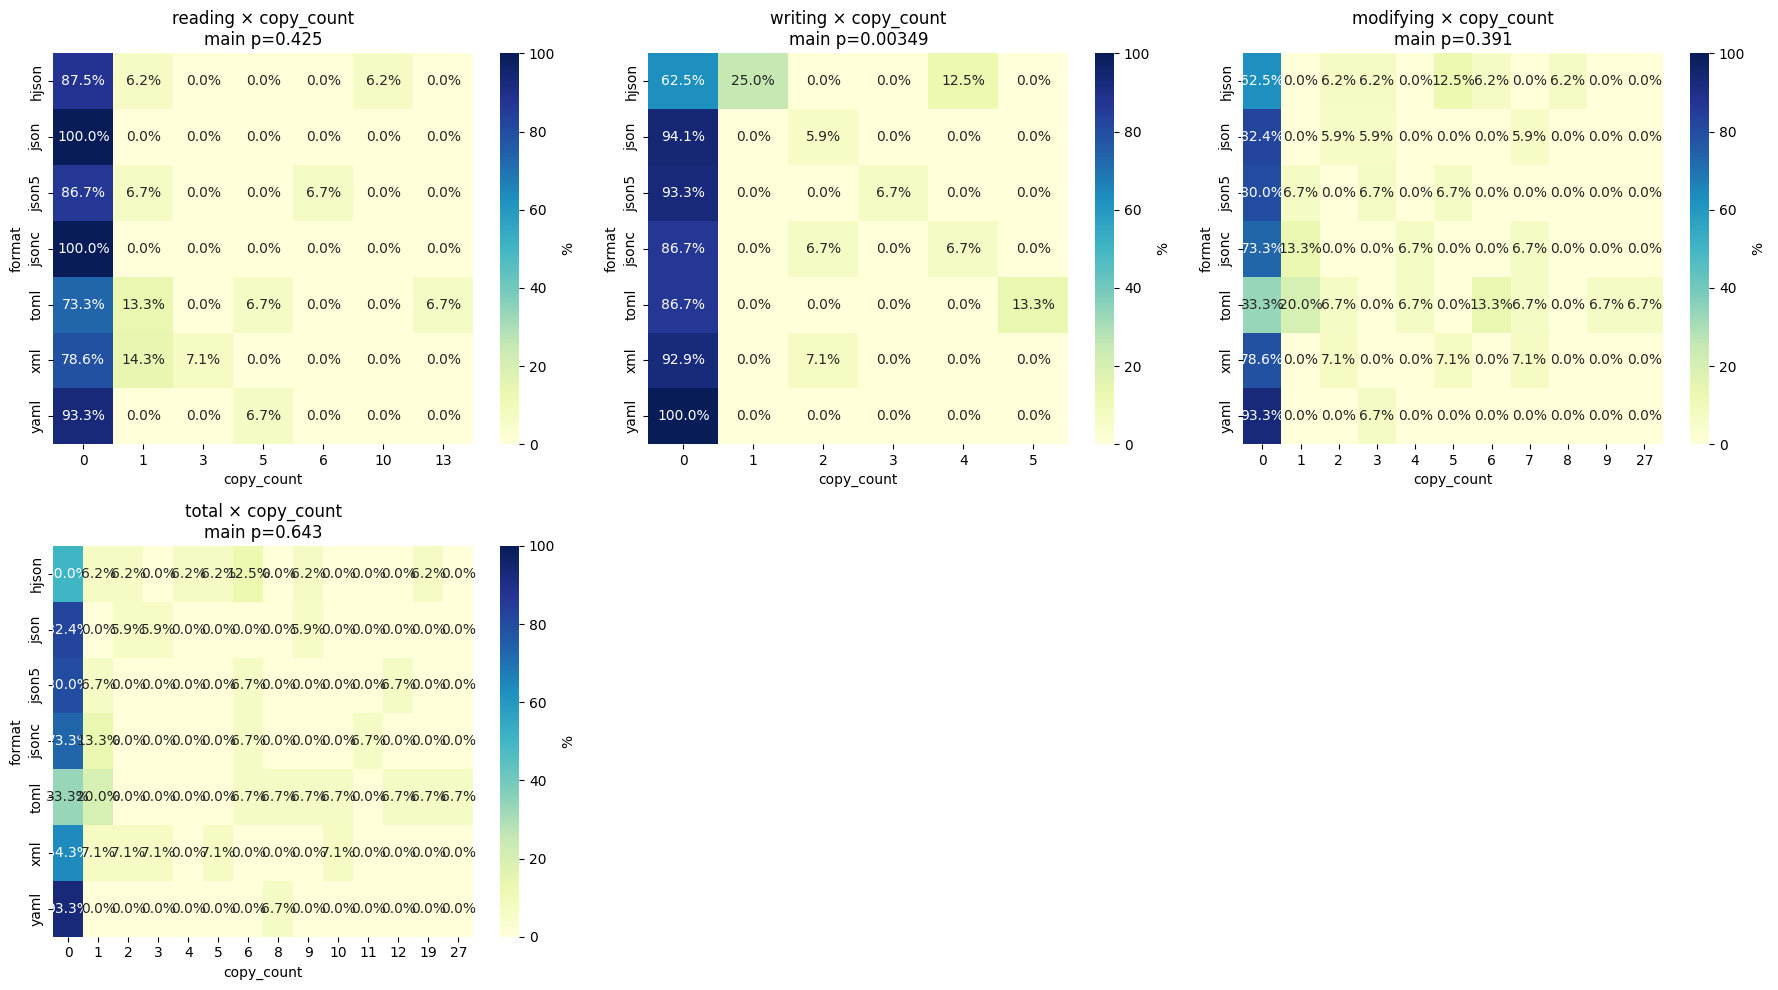

In [61]:
fig, posthoc = compare_tasks_across_formats(
    df=agg_event,
    task_list=['reading','writing','modifying','total'],
    compare_values=['copy_count'],  # 传入一个或多个指标
    data_type='categorical',      # continuous 或 'categorical'
    test_type='auto',
    alpha=0.05,
    correction_method='holm'
)

### correlation analysis

#### time vs correct

In [ ]:
r, p = pearsonr(wide_f1_global_result['total_score'].dropna(), wide_ts_global_result['total_score'].dropna())
print(f"Pearson r = {r:.3f}, p-value = {p:.3f}")

In [64]:
import pandas as pd
from scipy.stats import pearsonr
import statsmodels.formula.api as smf

def analyze_relation(
    df_factor: pd.DataFrame,
    df_score: pd.DataFrame,
    on: list = ['participantId','format'],
    factor_col: str = 'duration_sec_total',
    score_col: str = 'total_score'
):
    # 1) 合并
    df = pd.merge(df_factor, df_score, on=on, how='inner')
    
    # 2) 整体 Pearson 相关
    r_all, p_all = pearsonr(df[factor_col], df[score_col])
    print(f"Overall Pearson r = {r_all:.3f}, p = {p_all:.3f}")
    
    # 3) 分 format 计算
    print("\nBy format:")
    for fmt, sub in df.groupby('format'):
        if len(sub) >= 3:  # 至少 3 个样本
            r, p = pearsonr(sub[factor_col], sub[score_col])
            print(f"  {fmt:6s}: r = {r:.3f}, p = {p:.3f}  (n={len(sub)})")
        else:
            print(f"  {fmt:6s}: too few (n={len(sub)})")
    
    # 4) ANCOVA： regression with interaction term
    #    model: score ~ duration + C(format) + duration:C(format)
    df['format'] = df['format'].astype('category')
    formula = f"{score_col} ~ {factor_col} * format"
    model = smf.ols(formula, data=df).fit()
    print("\nANCOVA (interaction) results:\n")
    print(model.summary().tables[1])  # 只打印系数表
    
    return df, model

# —— 用法示例 —— #
# df_time: 包含 participantId, format, duration_sec_total, normalized_time_total
# df_score: 包含 participantId, format, total_score
df, ancova_model = analyze_relation(total_time, wide_f1_global_result)


NameError: name 'wide_f1_global_result' is not defined

In [ ]:
# ## r = –0.157：总体上，“总时长”与“总分”呈弱负相关。

# p = 0.110 > 0.05：这个负相关不具统计显著性，你不能排除“其实没有相关”的可能。

# 换句话说，样本里整体来看，花更多时间并不一定得更高分（反而微弱呈相反方向），但相关性也不够显著。

# 每个 format 下样本数都在 13–17 左右。

# 有的 format（比如 json、xml）是弱正相关，有的（比如 json5、toml、yaml）是弱负相关。

# 但全部的 p 值都远大于 0.05，说明在任何单一 format 下，都看不到显著的时长—得分关系。

# 整体与各组：总时长和总分之间的相关都非常弱（|r|<0.5）且不显著（p>0.05），无论是全样本还是分 format。

# 回归/交互：ANCOVA 也没发现“某个 format 下时长影响得分的关系”与其他 format 有显著差异。

# 实用判断：在你的数据里，“花更多时间”并不是得分提升的关键因素，而且各个 format 之间在这条关系上也没有本质区别。



#### nasa vs correct

In [66]:
nasa_result.rename(columns={'frustration':'frustration', 'mental-demand':'mental_demand', 'physical-demand':'physical_demand', 'temporal-demand':'temporal_demand', 'performance':'performance', 'effort':'effort'},inplace=True)
df, ancova_model = analyze_relation(nasa_result, wide_ts_global_result,on=['participantId','format'],factor_col='frustration',score_col='total_score')

Overall Pearson r = -0.272, p = 0.005

By format:
  hjson : r = -0.141, p = 0.604  (n=16)
  json  : r = 0.087, p = 0.739  (n=17)
  json5 : r = -0.081, p = 0.774  (n=15)
  jsonc : r = -0.572, p = 0.026  (n=15)
  toml  : r = -0.302, p = 0.274  (n=15)
  xml   : r = -0.045, p = 0.878  (n=14)
  yaml  : r = -0.682, p = 0.005  (n=15)

ANCOVA (interaction) results:

                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.7432      0.082      9.064      0.000       0.580       0.906
format[T.json]                 -0.2213      0.135     -1.639      0.105      -0.490       0.047
format[T.json5]                -0.2302      0.129     -1.787      0.077      -0.486       0.026
format[T.jsonc]                 0.0168      0.129      0.130      0.897      -0.240       0.274
format[T.toml]                 -0.0141      0.116     -0.122   

In [67]:
df, ancova_model = analyze_relation(nasa_result, wide_ts_global_result,on=['participantId','format'],factor_col='mental_demand',score_col='total_score')

Overall Pearson r = -0.321, p = 0.001

By format:
  hjson : r = -0.450, p = 0.080  (n=16)
  json  : r = -0.142, p = 0.585  (n=17)
  json5 : r = -0.195, p = 0.486  (n=15)
  jsonc : r = -0.332, p = 0.226  (n=15)
  toml  : r = -0.448, p = 0.094  (n=15)
  xml   : r = 0.019, p = 0.948  (n=14)
  yaml  : r = -0.299, p = 0.279  (n=15)

ANCOVA (interaction) results:

                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.9272      0.139      6.656      0.000       0.651       1.204
format[T.json]                   -0.0540      0.650     -0.083      0.934      -1.345       1.237
format[T.json5]                  -0.1317      0.381     -0.346      0.730      -0.888       0.625
format[T.jsonc]                   0.0459      0.334      0.137      0.891      -0.618       0.710
format[T.toml]                    0.1604      0.328

In [68]:
df, ancova_model = analyze_relation(nasa_result, wide_ts_global_result,on=['participantId','format'],factor_col='physical_demand',score_col='total_score')

Overall Pearson r = -0.350, p = 0.000

By format:
  hjson : r = -0.474, p = 0.064  (n=16)
  json  : r = -0.414, p = 0.098  (n=17)
  json5 : r = 0.030, p = 0.916  (n=15)
  jsonc : r = -0.432, p = 0.107  (n=15)
  toml  : r = -0.436, p = 0.104  (n=15)
  xml   : r = 0.071, p = 0.809  (n=14)
  yaml  : r = -0.487, p = 0.065  (n=15)

ANCOVA (interaction) results:

                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.8268      0.080     10.364      0.000       0.668       0.985
format[T.json]                     -0.1392      0.127     -1.095      0.277      -0.392       0.113
format[T.json5]                    -0.3651      0.156     -2.335      0.022      -0.676      -0.055
format[T.jsonc]                    -0.1442      0.120     -1.199      0.234      -0.383       0.095
format[T.toml]                     -0.08

In [69]:
df, ancova_model = analyze_relation(nasa_result, wide_ts_global_result,on=['participantId','format'],factor_col='temporal_demand',score_col='total_score')

Overall Pearson r = -0.304, p = 0.001

By format:
  hjson : r = -0.428, p = 0.098  (n=16)
  json  : r = 0.060, p = 0.819  (n=17)
  json5 : r = -0.168, p = 0.550  (n=15)
  jsonc : r = -0.359, p = 0.189  (n=15)
  toml  : r = -0.325, p = 0.238  (n=15)
  xml   : r = 0.153, p = 0.602  (n=14)
  yaml  : r = -0.585, p = 0.022  (n=15)

ANCOVA (interaction) results:

                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.8273      0.088      9.451      0.000       0.653       1.001
format[T.json]                     -0.2982      0.147     -2.024      0.046      -0.591      -0.006
format[T.json5]                    -0.1973      0.217     -0.908      0.366      -0.629       0.234
format[T.jsonc]                    -0.0238      0.197     -0.121      0.904      -0.415       0.368
format[T.toml]                     -0.09

In [70]:
df, ancova_model = analyze_relation(nasa_result, wide_ts_global_result,on=['participantId','format'],factor_col='performance',score_col='total_score')

Overall Pearson r = -0.092, p = 0.348

By format:
  hjson : r = -0.120, p = 0.659  (n=16)
  json  : r = 0.065, p = 0.805  (n=17)
  json5 : r = 0.257, p = 0.356  (n=15)
  jsonc : r = -0.598, p = 0.019  (n=15)
  toml  : r = -0.037, p = 0.895  (n=15)
  xml   : r = -0.142, p = 0.627  (n=14)
  yaml  : r = -0.279, p = 0.314  (n=15)

ANCOVA (interaction) results:

                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.7379      0.083      8.861      0.000       0.573       0.903
format[T.json]                 -0.2004      0.115     -1.742      0.085      -0.429       0.028
format[T.json5]                -0.3429      0.119     -2.888      0.005      -0.579      -0.107
format[T.jsonc]                -0.0303      0.116     -0.261      0.795      -0.261       0.201
format[T.toml]                 -0.0635      0.147     -0.431    

In [71]:
df, ancova_model = analyze_relation(nasa_result, wide_ts_global_result,on=['participantId','format'],factor_col='effort',score_col='total_score')

Overall Pearson r = -0.246, p = 0.011

By format:
  hjson : r = -0.589, p = 0.016  (n=16)
  json  : r = -0.088, p = 0.736  (n=17)
  json5 : r = -0.248, p = 0.374  (n=15)
  jsonc : r = -0.108, p = 0.701  (n=15)
  toml  : r = -0.194, p = 0.488  (n=15)
  xml   : r = 0.243, p = 0.402  (n=14)
  yaml  : r = -0.414, p = 0.125  (n=15)

ANCOVA (interaction) results:

                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.9646      0.126      7.665      0.000       0.715       1.215
format[T.json]            -0.3052      0.364     -0.838      0.404      -1.029       0.418
format[T.json5]           -0.2324      0.259     -0.899      0.371      -0.746       0.281
format[T.jsonc]           -0.2966      0.318     -0.934      0.353      -0.928       0.334
format[T.toml]             0.0171      0.526      0.033      0.974      -1.027       1.061
fo

#### dc vs correct

In [72]:
df, ancova_model = analyze_relation(c_global_result, wide_ts_global_result,on=['participantId','format'],factor_col='confidence_total',score_col='total_score')

Overall Pearson r = 0.211, p = 0.029

By format:
  hjson : r = 0.021, p = 0.938  (n=16)
  json  : r = -0.041, p = 0.875  (n=17)
  json5 : r = 0.427, p = 0.112  (n=15)
  jsonc : r = 0.362, p = 0.185  (n=15)
  toml  : r = 0.007, p = 0.980  (n=15)
  xml   : r = 0.122, p = 0.678  (n=14)
  yaml  : r = 0.255, p = 0.359  (n=15)

ANCOVA (interaction) results:

                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.6943      0.161      4.323      0.000       0.375       1.013
format[T.json]                      -0.1059      0.295     -0.359      0.721      -0.693       0.481
format[T.json5]                     -0.4885      0.218     -2.239      0.028      -0.922      -0.055
format[T.jsonc]                     -0.4629      0.250     -1.849      0.068      -0.960       0.034
format[T.toml]                      -0.

In [73]:
df, ancova_model = analyze_relation(d_global_result, wide_ts_global_result,on=['participantId','format'],factor_col='difficutly_total',score_col='total_score')

Overall Pearson r = -0.287, p = 0.003

By format:
  hjson : r = -0.152, p = 0.575  (n=16)
  json  : r = -0.084, p = 0.748  (n=17)
  json5 : r = -0.148, p = 0.598  (n=15)
  jsonc : r = -0.572, p = 0.026  (n=15)
  toml  : r = 0.058, p = 0.839  (n=15)
  xml   : r = 0.034, p = 0.908  (n=14)
  yaml  : r = -0.541, p = 0.037  (n=15)

ANCOVA (interaction) results:

                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.7453      0.082      9.123      0.000       0.583       0.907
format[T.json]                      -0.1704      0.118     -1.447      0.151      -0.404       0.064
format[T.json5]                     -0.2061      0.128     -1.613      0.110      -0.460       0.048
format[T.jsonc]                     -0.0391      0.116     -0.336      0.738      -0.270       0.192
format[T.toml]                    

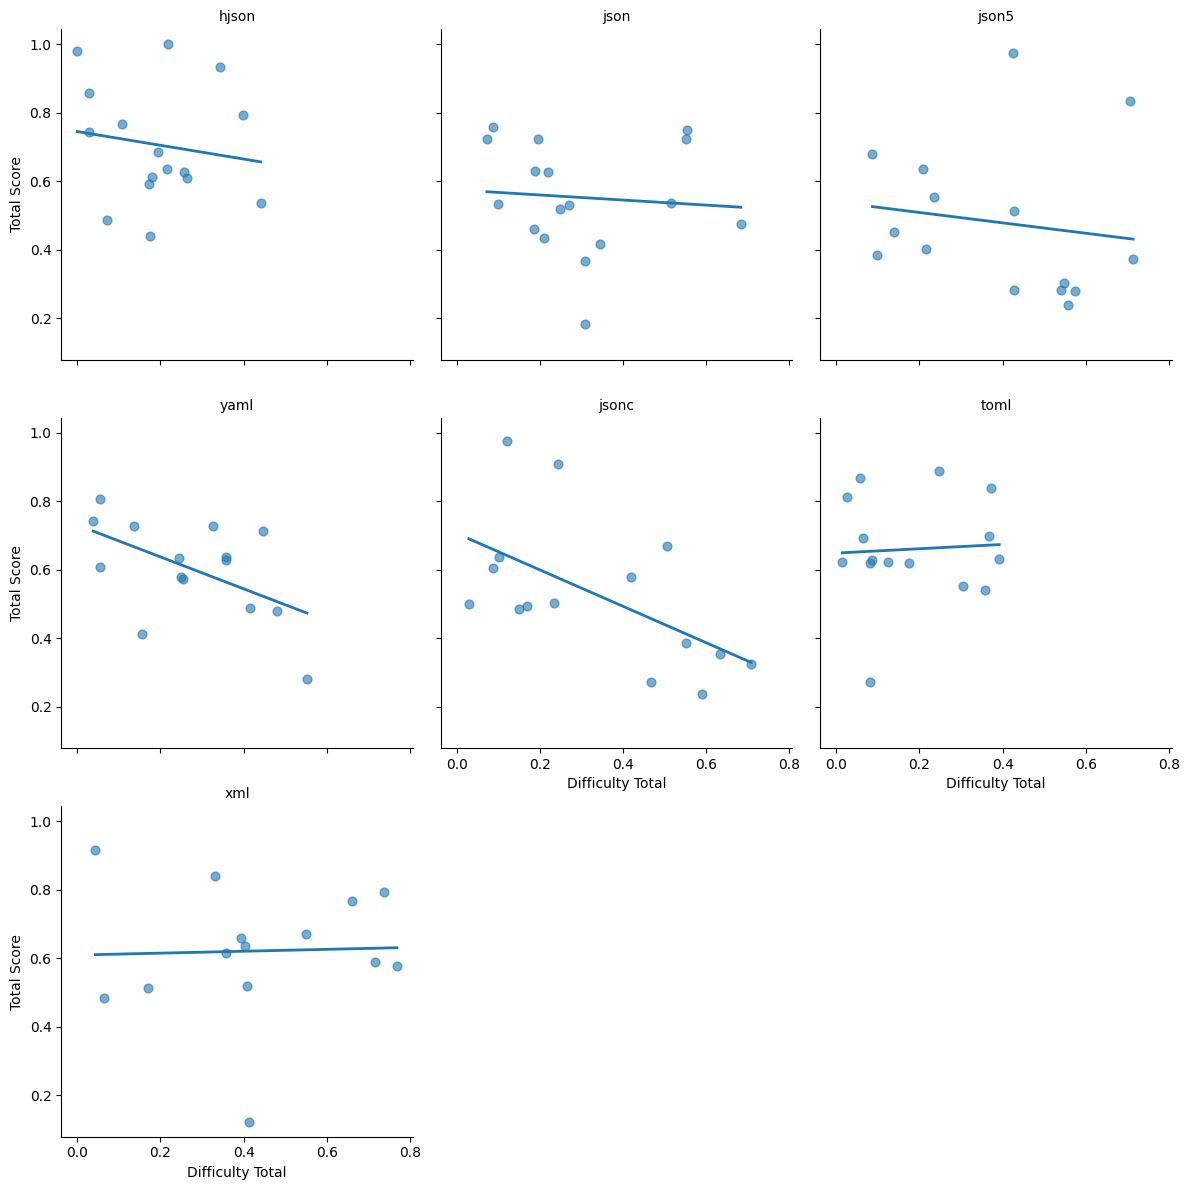

In [74]:
df_metric  = d_global_result            # 包含 difficulty_total 这一列
df_score = wide_ts_global_result      # 包含 total_score 这一列

# 1) 合并到一个 df
df_merged = pd.merge(
    df_metric,
    df_score[['participantId','format','total_score']],
    on=['participantId','format'],
    how='inner'
)

# 2) 然后把这个 df_merged 传给刚才画回归线的函数：
fig = plot_score_vs_difficulty_by_format(
    df_merged,
    metric_col='difficutly_total',
    score_col='total_score',
    facet_cols=3
)

### cmd experience

In [119]:
total.to_csv('/Users/shiyi.he/Desktop/DSF_Analysis/total_tabular.csv',index=False)

In [75]:
agg_event_total=agg_event[agg_event['task']=='total']
experience=post_result[['participantId','format','task','q10_years']]
experience

participantId format   task  q10_years
0    64457bc906c125cebd4bf66b  json5  total       0.00
1    6697c8b6d9d7baa7edd8c4d3  hjson  total       1.00
2    67e25388d573ec2d5f1c8442   yaml  total       0.17
3    67e5cf90b79d0874e1cf16b0   toml  total       3.42
4    67d00f24466a67ba7e41228e   toml  total       1.67
..                        ...    ...    ...        ...
102  67ab650c320eccf6141d4010  jsonc  total       0.83
103  65fad673a546ab14baf2f8d3  json5  total       2.00
104  67f1c7bd6f1c4a3d8deae02f   toml  total       4.00
105  67adb27bd5f5776fcb16da62  hjson  total       0.50
106  6675c40cdc52b37294f0514e  hjson  total       0.25

[107 rows x 4 columns]

In [76]:
experience['q10_years'].value_counts()

q10_years
0.00     19
1.00     11
0.17      9
0.50      8
2.00      7
4.00      7
0.25      7
5.00      5
0.08      4
3.00      4
1.50      4
1.67      2
0.83      2
1.17      1
4.67      1
6.33      1
1.42      1
17.00     1
1.83      1
1.92      1
3.17      1
0.04      1
2.50      1
10.00     1
0.33      1
15.00     1
5.17      1
0.67      1
6.67      1
3.42      1
0.92      1
Name: count, dtype: int64

In [77]:
bins = [-0.01, 0, 1, 3, 5, float("inf")]
labels = ["0", "0–1", "1–2", "2-3", "3+"]

experience["q10_years_binned"] = pd.cut(
    experience["q10_years"],
    bins=bins,
    labels=labels
)
experience["q10_years_binned"].value_counts()

/var/folders/z4/3vn4jgtj71n_hdpgm6b1r_ww0000gp/T/ipykernel_26541/3658590902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experience["q10_years_binned"] = pd.cut(


q10_years_binned
0–1    45
1–2    22
0      19
2-3    15
3+      6
Name: count, dtype: int64

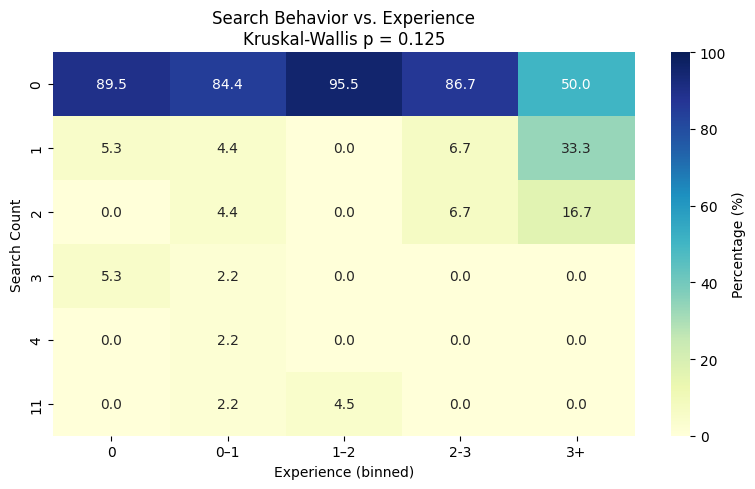

In [78]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import pearsonr, spearmanr
# import statsmodels.formula.api as smf

# def analyze_experience_vs_search(agg_df: pd.DataFrame, exp_df: pd.DataFrame):
#     agg_tot = agg_df
#     exp_tot = exp_df[exp_df['task'] == 'total']

#     # 2) 合并
#     df = pd.merge(
#         agg_tot[['participantId','format','search_count']],
#         exp_tot[['participantId','format','q10_years']],
#         on=['participantId','format'],
#         how='inner'
#     ).dropna(subset=['q10_years','search_count'])

#     # 3) 可视化：散点 + 回归
#     plt.figure(figsize=(6,5))
#     sns.regplot(
#         data=df,
#         x='q10_years', y='search_count',
#         scatter_kws={'s':50, 'alpha':0.7},
#         line_kws={'color':'r'}
#     )
#     plt.xlabel("experience(years)")
#     plt.ylabel("search_count")
#     plt.title("experience vs. search_count")
#     plt.tight_layout()
#     plt.show()

#     # 4) 相关性
#     r_p, p_p = pearsonr(df['q10_years'], df['search_count'])
#     r_s, p_s = spearmanr(df['q10_years'], df['search_count'])
#     print(f"Pearson r = {r_p:.3f}, p = {p_p:.3f}")
#     print(f"Spearman rho = {r_s:.3f}, p = {p_s:.3f}\n")

#     # 5) 线性回归 (OLS)
#     model = smf.ols("search_count ~ q10_years", data=df).fit()
#     print(model.summary())

#     return df, model

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

def analyze_experience_heatmap(agg_df: pd.DataFrame, exp_df: pd.DataFrame):
    # 合并数据（假设 search_count_binned 已存在）
    agg_tot = agg_df
    exp_tot = exp_df[exp_df['task'] == 'total']

    df = pd.merge(
        agg_tot[['participantId','format','search_count']],
        exp_tot[['participantId','format','q10_years_binned']],
        on=['participantId','format'],
        how='inner'
    ).dropna(subset=['q10_years_binned','search_count'])

    # 热力图数据（按经验分组，统计每组中各 search bin 的比例）
    heat_data = pd.crosstab(
        df["search_count"], df["q10_years_binned"],
        normalize='columns'
    ) * 100

    # Kruskal-Wallis 显著性检验
    group_data = [
        df[df["q10_years_binned"] == g]["search_count"]
        for g in df["q10_years_binned"].cat.categories
    ]
    stat, p_value = stats.kruskal(*group_data)

    # 绘制热力图
    plt.figure(figsize=(8, 5))
    sns.heatmap(heat_data, annot=True, fmt=".1f", cmap="YlGnBu",
                vmin=0, vmax=100, cbar_kws={'label': 'Percentage (%)'})
    plt.xlabel("Experience (binned)")
    plt.ylabel("Search Count")
    plt.title(f"Search Behavior vs. Experience\nKruskal-Wallis p = {p_value:.3g}")
    plt.tight_layout()
    plt.show()

    return df, p_value


df, p_value = analyze_experience_heatmap(agg_event_total, experience)



In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

def analyze_experience_heatmap_raw_count(agg_df: pd.DataFrame, exp_df: pd.DataFrame):
    # 1. 合并数据（假设经验已分箱为 q10_years_binned）
    agg_tot = agg_df
    exp_tot = exp_df[exp_df['task'] == 'total']

    df = pd.merge(
        agg_tot[['participantId','format','search_count']],
        exp_tot[['participantId','format','q10_years_binned']],
        on=['participantId','format'],
        how='inner'
    ).dropna(subset=['q10_years_binned','search_count'])

    # 2. 计算原始计数（不归一化）
    cross_tab = pd.crosstab(
        df["search_count"], df["q10_years_binned"]
    )

    # 3. 计算每格的百分比（以总参与人数为基准）
    percent_table = (cross_tab / cross_tab.values.sum()) * 100

    # 4. Kruskal-Wallis 显著性检验（基于原始 search_count）
    group_data = [
        df[df["q10_years_binned"] == g]["search_count"]
        for g in df["q10_years_binned"].cat.categories
    ]
    stat, p_value = stats.kruskal(*group_data)

    # 5. 可视化热力图
    plt.figure(figsize=(8, 6))
    sns.heatmap(percent_table, annot=True, fmt=".2f", cmap="YlGnBu",
                cbar_kws={'label': 'Percentage of total (%)'})
    plt.xlabel("Experience (binned)")
    plt.ylabel("Search Count (raw)")
    plt.title(f"Search Count vs. Experience\nKruskal-Wallis p = {p_value:.3g}")
    plt.tight_layout()
    plt.show()

    return df, p_value

df, p_value = analyze_experience_heatmap_raw_count(agg_event_total, experience)


[PCA Interpretation]
PC1 explains 44.5% of the variance, and PC2 explains 23.9%.
Together, the 2D PCA projection captures 68.4% of the total variance.
This means the PCA projection reasonably preserves the structure of the original metric space.



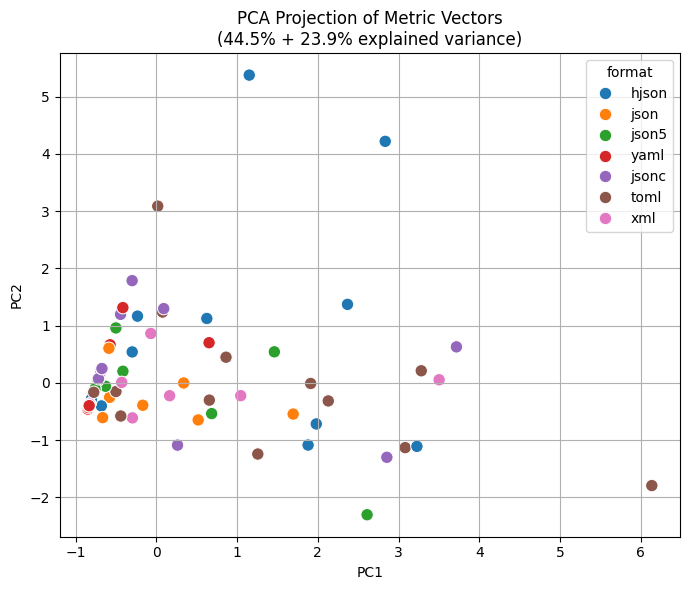

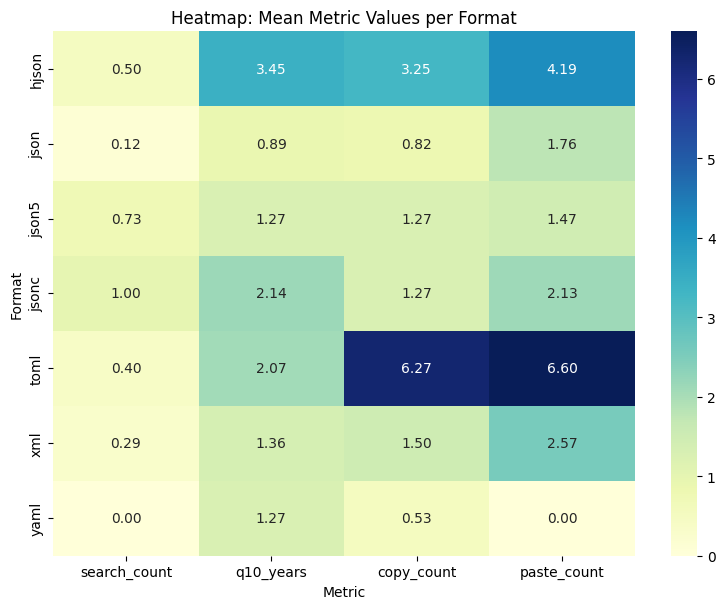

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def visualize_format_metric_space(df: pd.DataFrame, format_col: str, metric_cols: list):
    """
    Visualizes metric vectors per format using:
    - PCA 2D projection (with interpretation)
    - Heatmap of raw means
    """
    n_metrics = len(metric_cols)
    formats = df[format_col].unique()

    # ===== 1) PCA Projection =====
    if n_metrics >= 2:
        X = df[metric_cols].values
        X_scaled = StandardScaler().fit_transform(X)

        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        explained = pca.explained_variance_ratio_
        total_explained = explained[0] + explained[1]

        df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
        df_plot[format_col] = df[format_col].values

        # 📢 PCA Interpretation
        print(f"[PCA Interpretation]")
        print(f"PC1 explains {explained[0]:.1%} of the variance, and PC2 explains {explained[1]:.1%}.")
        print(f"Together, the 2D PCA projection captures {total_explained:.1%} of the total variance.")
        if total_explained < 0.60:
            print("Note: Since this is below 60%, the projection may not fully represent the structure of the original data.\n")
        else:
            print("This means the PCA projection reasonably preserves the structure of the original metric space.\n")

        # 🎨 PCA Scatter Plot
        plt.figure(figsize=(7, 6))
        sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue=format_col, s=80)
        plt.title(f"PCA Projection of Metric Vectors\n({explained[0]:.1%} + {explained[1]:.1%} explained variance)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # ===== 2) Heatmap of Raw Group Means =====
    df_mean = df.groupby(format_col)[metric_cols].mean()
    plt.figure(figsize=(8, len(formats) * 0.6 + 2))
    sns.heatmap(df_mean, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
    plt.title("Heatmap: Mean Metric Values per Format")
    plt.xlabel("Metric")
    plt.ylabel("Format")
    plt.tight_layout()
    plt.show()



visualize_format_metric_space(total, format_col='format', metric_cols=['search_count', 'q10_years','copy_count','paste_count'])


In [82]:
merged_df = agg_event_total.merge(experience[['participantId','q10_years','q10_years_binned']], on='participantId', how='left')
total = merged_df.merge(wide_ts_global_result[['participantId','total_score']], on='participantId', how='left')
total

participantId format   task  help_count  search_count  \
0    56cb8858edf8da000b6df354  hjson  total           1             0   
1    57c357770e6a1f00015f6038   json  total          15             1   
2    5b68c9eb87af310001584803  json5  total           7             0   
3    5c6414540821d30001046198  hjson  total          10             0   
4    5d30dfa68b1523000134878f   json  total           5             0   
..                        ...    ...    ...         ...           ...   
102  67f1a4f8dd44e7cd5adffa29  json5  total           0             0   
103  67f1c7bd6f1c4a3d8deae02f   toml  total           0             0   
104  67f3619e16d4ca195fbd1bd0   yaml  total           0             0   
105  67f5bb69760b211cdfe8021c  jsonc  total           0             0   
106  67f913a9b5c79e960807c7e3   yaml  total           3             0   

     copy_count  paste_count  q10_years q10_years_binned  total_score  
0             4            4       5.00              2-3     0.742656  
1             0            0       1.00              0–1     0.535604  
2             0            0       0.17              0–1     0.403386  
3             0            0       0.04              0–1     0.626937  
4             3            8       0.08              0–1     0.723415  
..          ...          ...        ...              ...          ...  
102           0            0       4.00              2-3     0.373609  
103          19            9       4.00              2-3     0.691687  
104           0            0       5.00              2-3     0.572115  
105           0            0       2.00              1–2     0.668555  
106           8            0       4.00              2-3     0.578078  

[107 rows x 10 columns]

=== Overall Regression ===
                            OLS Regression Results                            
Dep. Variable:            total_score   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.057
Date:                Tue, 08 Jul 2025   Prob (F-statistic):              0.154
Time:                        14:55:20   Log-Likelihood:                 27.618
No. Observations:                 107   AIC:                            -51.24
Df Residuals:                     105   BIC:                            -45.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept  

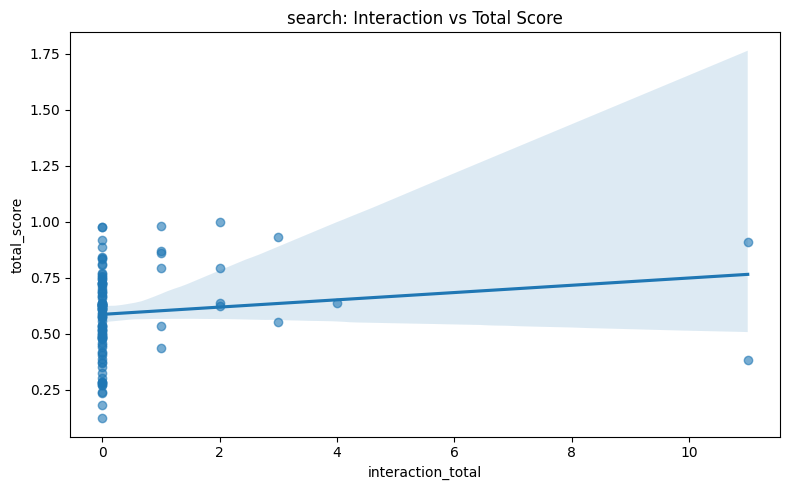


=== Regression with format interaction ===
                            OLS Regression Results                            
Dep. Variable:            total_score   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     2.982
Date:                Tue, 08 Jul 2025   Prob (F-statistic):            0.00145
Time:                        14:55:20   Log-Likelihood:                 43.839
No. Observations:                 107   AIC:                            -61.68
Df Residuals:                      94   BIC:                            -26.93
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

/Users/shiyi.he/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<Figure size 1000x600 with 0 Axes>

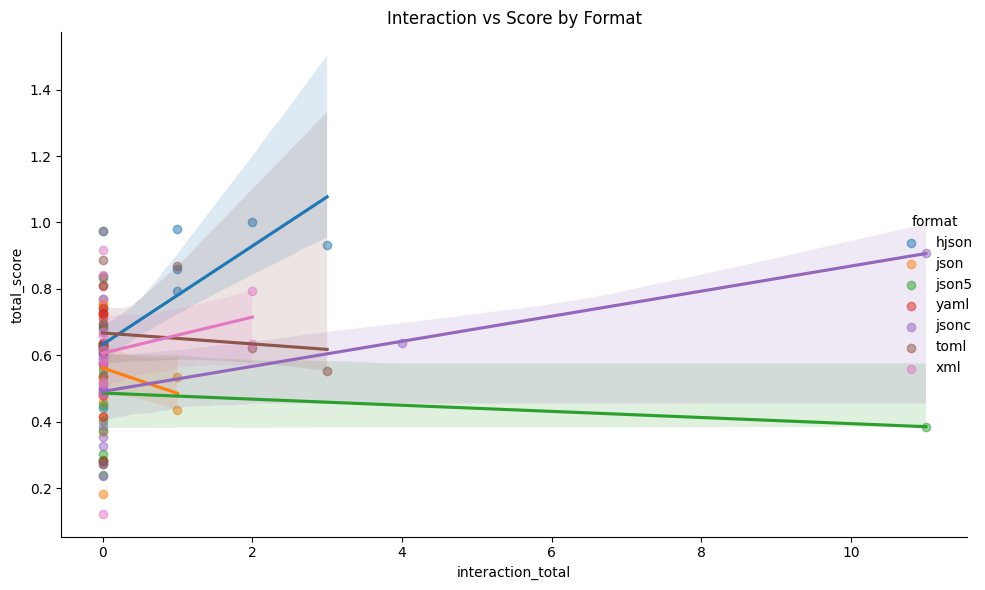

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

def analyze_interaction_effect(df: pd.DataFrame):
    # 1. 计算总交互次数
    df['interaction_total'] = df[['search_count']].sum(axis=1)

    # 2. 总体关系回归分析
    model1 = smf.ols('total_score ~ interaction_total', data=df).fit()
    print("=== Overall Regression ===")
    print(model1.summary())

    # 3. 可视化整体关系
    plt.figure(figsize=(8,5))
    sns.regplot(data=df, x='interaction_total', y='total_score', ci=95, scatter_kws={'alpha':0.6})
    plt.title("search: Interaction vs Total Score")
    plt.tight_layout()
    plt.show()

    # 4. 含 format 交互项的回归
    model2 = smf.ols('total_score ~ interaction_total * format', data=df).fit()
    print("\n=== Regression with format interaction ===")
    print(model2.summary())

    # 5. 分 format 可视化
    plt.figure(figsize=(10,6))
    sns.lmplot(
        data=df,
        x='interaction_total', y='total_score',
        hue='format',
        height=6, aspect=1.5,
        ci=95, scatter_kws={'alpha':0.5}
    )
    plt.title("Interaction vs Score by Format")
    plt.tight_layout()
    plt.show()

analyze_interaction_effect(total)  # total 是你合并后的 DataFrame


In [121]:

def pivot_scores(
    df: pd.DataFrame,
    participant_col: str = 'participantId',
    format_col: str = 'format',
    task_col: str = 'task',
    value_col: str = 'correct'
) -> pd.DataFrame:
    """
    把 df 按 participantId + format 透视成宽表，
    列名格式如 <task>-correct。
    """
    # 1) 透视
    wide = df.pivot(
        index=[participant_col, format_col],
        columns=task_col,
        values=value_col
    ).reset_index()

    # 2) 去掉 columns 的 name
    wide.columns.name = None

    # 3) 重命名 task 列，添加后缀 "-correct"
    wide = wide.rename(columns=lambda c: f"{c}-{value_col}"
                       if c not in {participant_col, format_col} else c)
    return wide


def add_parse_score(
    df: pd.DataFrame,
    metric: str = "tree_similarity"
) -> pd.DataFrame:
    """
    - 将 strict_parse、loose_parse 从 bool 转成 0/1（int）
    - 新增一列 score：
        * strict_parse==1: score = 1*0.5 + 0.5 * df[metric]
        * strict_parse==0 & loose_parse==1: score = 0.5*0.5 + 0.5 * df[metric]
        * strict_parse==0 & loose_parse==0: score = 0   + 0.5 * df[metric]
    参数:
      df     -- 原始 DataFrame，必须含有 strict_parse, loose_parse, tree_similarity, f1
      metric -- 选择用哪个列做后半部分（"tree_similarity" 或 "f1"）
    返回:
      带有 strict_parse, loose_parse（int）和 score 列的新 DataFrame
    """
    df2 = df.copy()
    # 1) 转成 0/1
    df2['strict_parse'] = df2['strict_parse'].astype(int)
    df2['loose_parse']  = df2['loose_parse'].astype(int)

    # 2) 计算 score
    #    严格 parse 权重 0.5，宽松 parse 权重 0.25，metric 权重 0.5
    base_strict = 1
    base_loose = 0.25

    # 用 vectorized 方式避免逐行 apply
    # 首先计算 parse 部分分数
    df2['parse_score'] = df2['strict_parse'] * base_strict
  
    # 然后加上 0.5 * metric
    df2['score'] = 0.5 *df2['parse_score'] + 0.5 * df2[metric]

    # 最后删掉中间列（可选）
    df2 = df2.drop(columns=['parse_score'])

    return df2

modifying_score_ts= add_parse_score(modifying_result, metric="tree_similarity")
modifying_score_f1= add_parse_score(modifying_result, metric="f1")
wide_modifying_score_ts = pivot_scores(modifying_score_ts,participant_col='participantId',format_col='format',task_col='task',value_col='score')
wide_modifying_score_f1 = pivot_scores(modifying_score_f1,participant_col='participantId',format_col='format',task_col='task',value_col='score')

writing_score_ts= add_parse_score(writing_result, metric="tree_similarity")
writing_score_f1= add_parse_score(writing_result, metric="f1")
wide_writing_score_ts = pivot_scores(writing_score_ts,participant_col='participantId',format_col='format',task_col='task',value_col='score')
wide_writing_score_f1 = pivot_scores(writing_score_f1,participant_col='participantId',format_col='format',task_col='task',value_col='score')

import pandas as pd
from functools import reduce

def merge_all_scores(
    dfs: list[pd.DataFrame],
    on: list[str] = ['participantId', 'format'],
    how: str = 'outer'
) -> pd.DataFrame:

    return reduce(
        lambda left, right: pd.merge(left, right, on=on, how=how),
        dfs
    )


wide_f1 = merge_all_scores([
    wide_reading_scores,
    wide_modifying_score_f1,
    wide_writing_score_f1
])

wide_ts = merge_all_scores([
    wide_reading_scores,
    wide_modifying_score_ts,
    wide_writing_score_ts
])

wide_ts_group=total_score_group_norm(wide_ts)
wide_ts_global=total_score_global_then_group(wide_ts)
wide_ts_group_result=wide_ts_group[['participantId','format','total_score']]
wide_ts_group_result['task']='total'
wide_ts_global_result=wide_ts_global[['participantId','format','total_score']]
wide_ts_global_result['task']='total'

wide_ts_global_result['task']='tabular'
wide_ts_global_result.to_csv('/Users/shiyi.he/Desktop/DSF_Analysis/score_tabular.csv',index=False)

/var/folders/z4/3vn4jgtj71n_hdpgm6b1r_ww0000gp/T/ipykernel_26541/1999074620.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wide_ts_group_result['task']='total'
/var/folders/z4/3vn4jgtj71n_hdpgm6b1r_ww0000gp/T/ipykernel_26541/1999074620.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wide_ts_global_result['task']='total'
/var/folders/z4/3vn4jgtj71n_hdpgm6b1r_ww0000gp/T/ipykernel_26541/1999074620.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

### sequance

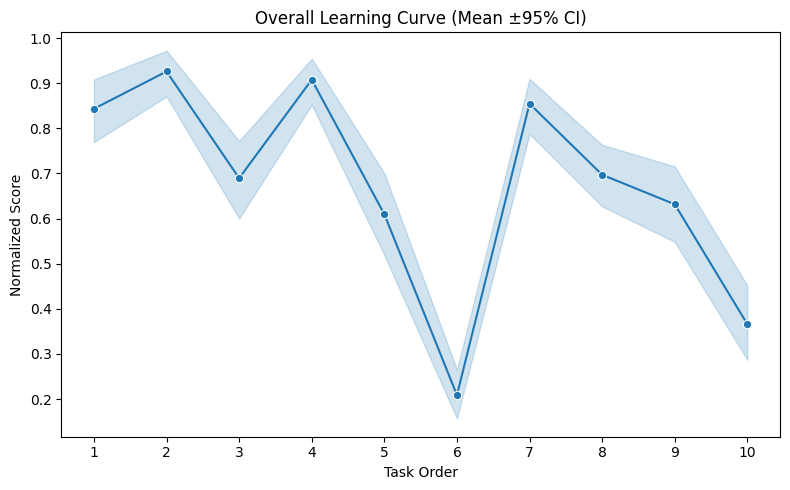

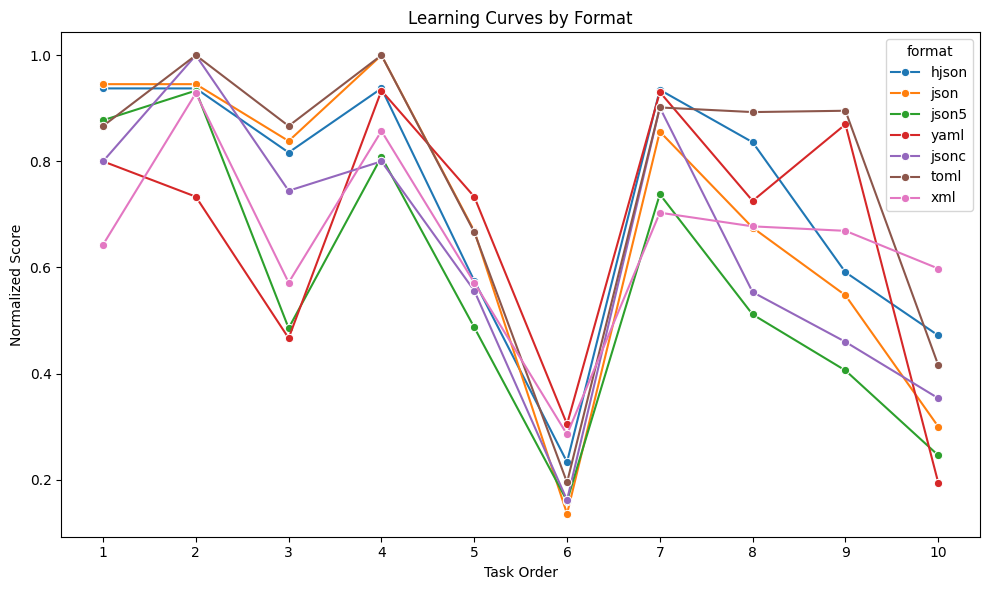

/Users/shiyi.he/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/shiyi.he/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/shiyi.he/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/shiyi.he/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/shiyi.he/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimizatio

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: score_norm
No. Observations: 1070    Method:             ML        
No. Groups:       107     Scale:              0.1505    
Min. group size:  10      Log-Likelihood:     -569.4612 
Max. group size:  10      Converged:          No        
Mean group size:  10.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     0.903    0.031  28.767 0.000  0.841  0.964
task_index   -0.042    0.004 -10.098 0.000 -0.050 -0.034
Group Var     0.035    0.030                            



/Users/shiyi.he/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/shiyi.he/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/shiyi.he/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/shiyi.he/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(



MixedLM with interaction:
                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     score_norm
No. Observations:      1070        Method:                 ML        
No. Groups:            107         Scale:                  0.1460    
Min. group size:       10          Log-Likelihood:         -558.9390 
Max. group size:       10          Converged:              No        
Mean group size:       10.0                                          
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   0.956    0.082 11.652 0.000  0.795  1.117
format[T.json]              0.081    0.114  0.709 0.478 -0.143  0.305
format[T.json5]            -0.065    0.118 -0.548 0.584 -0.296  0.167
format[T.jsonc]            -0.028    0.118 -0.239 0.811 -0.259  0.203
format[T.

/Users/shiyi.he/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/shiyi.he/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/Users/shiyi.he/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 63.145956
  warnings.warn(msg, ConvergenceWarning)


In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

def analyze_learning_curve(
    wide_df: pd.DataFrame,
    participant_col: str = 'participantId',
    format_col: str      = 'format',
    score_suffix: str    = '-correct',
    task_order: list     = None
):
    """
    计算并可视化学习曲线，并用混合效应模型进行统计检验。

    参数:
      - wide_df: 宽表，包含每个任务得分的列
      - participant_col: 参与者列名
      - format_col: 格式列名
      - score_suffix: （可选）自动识别列用的后缀；若为 None，则不做过滤
      - task_order: 明确指定的任务顺序（推荐）

    返回:
      - long_df: 长表格式数据
      - lme_fit: 混合线性模型主效应
      - lme_fit2: 主效应 + 交互项模型
    """
    # 1) 识别 task 列
    if task_order is None:
        if score_suffix is None:
            raise ValueError("If task_order is None, score_suffix must be provided.")
        score_cols = [c for c in wide_df.columns if c.endswith(score_suffix)]
        task_order = score_cols.copy()
    else:
        task_order = [t for t in task_order if t in wide_df.columns]  # 只保留实际存在的列

    order_map = {t: i+1 for i, t in enumerate(task_order)}

    # 2) melt 成长表
    long_df = pd.melt(
        wide_df,
        id_vars=[participant_col, format_col],
        value_vars=task_order,
        var_name='task',
        value_name='score'
    )
    long_df['task_index'] = long_df['task'].map(order_map)

    # 3) 每个 participant 内 min-max 归一化
    def minmax(x):
        mn, mx = x.min(), x.max()
        return (x - mn) / (mx - mn) if mx > mn else 0.0

    long_df['score_norm'] = (
        long_df
        .groupby(participant_col)['score']
        .transform(minmax)
    )

    # 4) 学习曲线（总体）
    plt.figure(figsize=(8,5))
    sns.lineplot(
        data=long_df,
        x='task_index', y='score_norm',
        estimator='mean', ci=95, marker='o'
    )
    plt.xticks(
        ticks=list(order_map.values()),
        labels=list(order_map.values())
    )
    plt.xlabel("Task Order")
    plt.ylabel("Normalized Score")
    plt.title("Overall Learning Curve (Mean ±95% CI)")
    plt.tight_layout()
    plt.show()

    # 5) 分 format 学习曲线
    plt.figure(figsize=(10,6))
    sns.lineplot(
        data=long_df,
        x='task_index', y='score_norm',
        hue=format_col,
        estimator='mean', ci=None, marker='o'
    )
    plt.xticks(
        ticks=list(order_map.values()),
        labels=list(order_map.values())
    )
    plt.xlabel("Task Order")
    plt.ylabel("Normalized Score")
    plt.title("Learning Curves by Format")
    plt.legend(title=format_col)
    plt.tight_layout()
    plt.show()

    # 6) MixedLM (主效应)
    md = smf.mixedlm(
        "score_norm ~ task_index",
        long_df,
        groups=long_df[participant_col]
    )
    lme_fit = md.fit(reml=False)
    print(lme_fit.summary())

    # 7) MixedLM (主效应 + format交互)
    md2 = smf.mixedlm(
        "score_norm ~ task_index * " + format_col,
        long_df,
        groups=long_df[participant_col]
    )
    lme_fit2 = md2.fit(reml=False)
    print("\nMixedLM with interaction:")
    print(lme_fit2.summary())

    print("✅ Task columns used in curve:", task_order)

    return long_df, lme_fit, lme_fit2


# 假设 wide_f1 已经在环境中，且列名里含有 reading-task-*-correct 等
# 如果你有固定的任务顺序，也可以手动传入：
task_sequence = ['reading-task-tabular-1-correct',
       'reading-task-tabular-2-correct', 'reading-task-tabular-3-correct',
       'reading-task-tabular-4-correct', 'reading-task-tabular-5-correct', 'writing-task-tabular-score',
       'modifying-task-tabular-1-score', 'modifying-task-tabular-2-score',
       'modifying-task-tabular-3-score', 'modifying-task-tabular-4-score']

long_df, lme1, lme2 = analyze_learning_curve(
    wide_df        = wide_ts,
    participant_col = 'participantId',
    format_col      = 'format',
    score_suffix    = None,  # 👈 关闭自动过滤
    task_order      = task_sequence
)

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.preprocessing import MinMaxScaler


# 手动指定任务顺序
task_sequence = [
    'reading-task-tabular-1-correct',
    'reading-task-tabular-2-correct',
    'reading-task-tabular-3-correct',
    'reading-task-tabular-4-correct',
    'reading-task-tabular-5-correct',
    'writing-task-tabular-score',
    'modifying-task-tabular-1-score',
    'modifying-task-tabular-2-score',
    'modifying-task-tabular-3-score',
    'modifying-task-tabular-4-score'
]

# 归一化（虽为0-1，仍统一处理以防微差）
scaler = MinMaxScaler()
wide_ts[task_sequence] = scaler.fit_transform(wide_ts[task_sequence])

# 转为 long format
long_df = pd.melt(
    wide_ts,
    id_vars=["participantId", "format"],
    value_vars=task_sequence,
    var_name="task_name",
    value_name="score"
)

# 添加顺序列
task_order_map = {name: i+1 for i, name in enumerate(task_sequence)}
long_df["task_order"] = long_df["task_name"].map(task_order_map)

# 平均分数趋势图
avg_scores = long_df.groupby("task_order")["score"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_scores, x="task_order", y="score", marker="o", linewidth=2, color="orange")
plt.title("Average Score by Task Order")
plt.xlabel("Task Order (Manual)")
plt.ylabel("Mean Score (Normalized)")
plt.xticks(ticks=range(1, len(task_sequence)+1), labels=[f"T{i}" for i in range(1, len(task_sequence)+1)], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 线性趋势检验
slope, intercept, r_value, p_value, std_err = linregress(long_df["task_order"], long_df["score"])
trend_result = {
    "slope": slope,
    "p_value": p_value,
    "r_squared": r_value ** 2
}
trend_result


{'slope': np.float64(-0.03559095719675031),
 'p_value': np.float64(2.0732241328094747e-16),
 'r_squared': np.float64(0.06130195345491112)}

In [ ]:
avg_by_format = long_df.groupby(["format", "task_order"])["score"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_by_format, x="task_order", y="score", hue="format", marker="o", linewidth=2)
plt.title("Average Score by Task Order for Each Format")
plt.xlabel("Task Order")
plt.ylabel("Mean Score (Normalized)")
plt.xticks(ticks=range(1, len(task_sequence)+1), labels=[f"T{i}" for i in range(1, len(task_sequence)+1)], rotation=45)
plt.grid(True)
plt.legend(title="Format")
plt.tight_layout()
plt.show()

#### cmd vs experience